## 1. Introduction

### Osteoporosis
Osteoporosis is the most common bone disease that develops when bone mineral density and bone mass decreases, or when the structure and strength of bone changes. It can increase the risk of fractures, i.e., broken bones. 

In the United States in 2010, an estimated 10.2 million people aged 50 and over had osteoporosis and about 43.3 million more people had low bone mass. However, it's a silent disease because people typically do not have symptom. Therefore, it would be benefitical to people's health if we can make an accurate prediction for it.

### NHANES
The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. Datasets of this program are prepared and published through the Centers for Disease Control and Prevention (CDC) and avaiable to the public.

In this project, we are going to analyze data from **NHANES** for the years **2013-2014, and 2017-March 2020 Pre-Pandemic**. 2015-2016 was skipped because Osteoporosis assessment in NHANES for that period was not completed. The NHANES program suspended field operations in March 2020 due to the coronavirus disease 2019 (COVID-19) pandemic. As a result, data collection for the NHANES 2019-2020 cycle was not completed and the collected data are not nationally representative. Therefore, data collected from 2019 to March 2020 were combined with data from the NHANES 2017-2018 cycle to form a nationally representative sample of NHANES 2017-March 2020 pre-pandemic data.

## 2. Objective

Design an accurate way to predict whether someone has osteoporosis based on age, gender, race, BMI, smoking, alcohol consumption, sleep duration, arthritis, liver condition, and whether a parent has osteoporosis.

## 3. Data Source

2013-2014 data can be downloaded from [link1](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2013), 2017-2020 data can be downloaded from [link2](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2017-2020). Files can be linked with other NHANES files by the respondent sequence number (SEQN). 

**1. Questionnaire Data: Osteoporosis**

The target sample for Osteoporosis Questionnaire in 2013-2014 and 2017-2020 are participants aged **40+** and **50+**, respectively.

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `OSQ150`: Parents ever told had osteoporosis?
- `OSQ060`: Ever told had osteoporosis/brittle bones
See the table for details of `OSQ150` and `OSQ060` 
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |


**2. Demographic Variables and Sample Weights**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `RIDAGEYR`: Age in years at screening
- `RIAGENDR`: Gender, see the table for details:
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Male              |
| 2             | Female            |
| .             | Missing           |

- `RIDRETH3 `: Race/Hispanic origin w/ Non-Hispanic Asian
| Code or Value | Value Description                   |
|---------------|-------------------------------------|
| 1             | Mexican American                    |
| 2             | Other Hispanic                      |
| 3             | Non-Hispanic White                  |
| 4             | Non-Hispanic Black                  |
| 6             | Non-Hispanic Asian                  |
| 7             | Other Race - Including Multi-Racial |
| .             | Missing                             |

**3. Examination Data: Body Measures**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `BMXBMI`: Body Mass Index (kg/m**2)

**4. Questionnaire Data: Smoking - Cigarette Use**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `SMQ020`:Smoked at least 100 cigarettes in life, see the table for details:
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |

**5. Questionnaire Data: Alcohol Use**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `ALQ151`: Ever have 4/5 or more drinks every day, see the table for details:

| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |


**6. Questionnaire Data: Sleep Disorders**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `SLD010H (SLD012)`: How much sleep do you get (hours), see the table for details:

SLD010H (2013-2014):

| Code or Value | Value Description              |
|---------------|--------------------------------|
| 2 to 11       | Range of Values                |
| 12            | 12 hours or more               |
| 77            | Refused                        |
| 99            | Don't know                     |

SLD012 (2017-2020):

| Code or Value | Value Description              |
|---------------|--------------------------------|
| 3 to 13.5     | Range of Values                |
| 2             | Less than 3 hours              |
| 14            | 14 hours or more               |
| -             | Missing                        |

**7. Questionnaire Data: Medical Conditions**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `MCQ160A`: Doctor ever said you had arthritis
- `MCA160L`: Ever told you had any liver condition

They all share the following table for details:

| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |



## 4. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.combine import SMOTETomek

from data_clean_utils import (
    import_data,
    clean_variable,
    clean_demographic, 
    clean_bmi,
    number_to_category,
    clean_sleep,
    get_percentage,
    countplot_by_category,
    barplot_percentage,
    compare_distribution,
    multi_countplot,
    plot_both_gender,
    gender_groupby,
    get_prevalence_ratios,
)
from machine_learning_utils import (
    make_mi_scores,
    train_test_standardscaler,
    plot_cf_matrix,
    get_predict_proba,
    plot_auc,
    binary_classification_scores,
    compare_oversampling_performance,
    get_nn_models,
    evaludate_nn_models,
)

# display settings of Pandas
pd.options.display.max_seq_items = 1000
pd.options.display.max_rows = 1000 
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 50
pd.set_option("display.precision", 3)

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# set seaborn theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 
                 "figure.dpi":100, 'savefig.dpi':100}
sns.set_theme(style="ticks", rc=custom_params)
%config InlineBackend.figure_format = "retina"

2023-03-19 22:18:18.083878: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 5. Importing the Data

### 5.1 Osteoporosis

In [2]:
data_oste = import_data('osteoporosis.XPT')
data_oste = data_oste[['SEQN', 'OSQ060']]
data_oste.head()

,SEQN,OSQ060
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,1.0
3,73561.0,2.0
4,73562.0,2.0


In [3]:
data_oste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8802 entries, 0 to 4986
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    8802 non-null   float64
 1   OSQ060  8801 non-null   float64
dtypes: float64(2)
memory usage: 206.3 KB


In [4]:
data_oste.OSQ060.value_counts()

2.0    7833
1.0     933
9.0      34
7.0       1
Name: OSQ060, dtype: int64

Osteoporosis as the target (dependent) variable, we only need the data whose `OSQ060` is 2 (No) or 1 (Yes), ignoring the several unknown answers (7 and 9, less than 0.4%).

### 5.2 Demographics

In [5]:
data_demo = import_data('demographics.XPT')
data_demo = data_demo[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3']]
data_demo.head()

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3
0,73557.0,69.0,1.0,4.0
1,73558.0,54.0,1.0,3.0
2,73559.0,72.0,1.0,3.0
3,73560.0,9.0,1.0,3.0
4,73561.0,73.0,2.0,3.0


In [6]:
data_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25735 entries, 0 to 15559
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      25735 non-null  float64
 1   RIDAGEYR  25735 non-null  float64
 2   RIAGENDR  25735 non-null  float64
 3   RIDRETH3  25735 non-null  float64
dtypes: float64(4)
memory usage: 1005.3 KB


In [7]:
data_demo.describe()

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3
count,25735.000,2.574e+04,25735.000,25735.000
mean,101860.657,3.285e+01,1.506,3.409
std,19185.829,2.499e+01,0.500,1.622
min,73557.000,5.398e-79,1.000,1.000
25%,79990.500,1.000e+01,1.000,3.000
50%,111955.000,2.900e+01,2.000,3.000
75%,118388.500,5.500e+01,2.000,4.000
max,124822.000,8.000e+01,2.000,7.000


What we can learn:

- There is no missing values in the demographics dataframe.
- `SEQN` should be string as it's the identifier of respondent.
- `RIAGENDR` (sex), and `RIDRETH3` are actually categorical data, we might need to convert them for easier interpretation in EDA.

### 5.3 BMI

In [8]:
data_bmi = import_data('body-measures.XPT')
data_bmi = data_bmi[['SEQN', 'BMXBMI']]
data_bmi.head()

,SEQN,BMXBMI
0,73557.0,26.7
1,73558.0,28.6
2,73559.0,28.9
3,73560.0,17.1
4,73561.0,19.7


In [9]:
data_bmi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24113 entries, 0 to 14299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    24113 non-null  float64
 1   BMXBMI  22192 non-null  float64
dtypes: float64(2)
memory usage: 565.1 KB


In [10]:
data_bmi.describe()

,SEQN,BMXBMI
count,24113.000,22192.000
mean,101431.637,26.258
std,19283.895,8.247
min,73557.000,11.900
25%,79810.000,20.100
50%,111702.000,25.400
75%,118322.000,30.900
max,124822.000,92.300


What we can learn:

- `BMXBMI` has about 8% missing values.
- `BMXBMI` might also have outliers, for example, the max value 92.3

Will need to deal the above issues when cleaning data.

### 5.4 Smoking

In [11]:
data_smoking = import_data('smoking.XPT')
data_smoking = data_smoking[['SEQN', 'SMQ020']]
data_smoking.head()

,SEQN,SMQ020
0,73557.0,1.0
1,73558.0,1.0
2,73559.0,1.0
3,73561.0,2.0
4,73562.0,1.0


In [12]:
data_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18305 entries, 0 to 11136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    18305 non-null  float64
 1   SMQ020  15806 non-null  float64
dtypes: float64(2)
memory usage: 429.0 KB


In [13]:
data_smoking.SMQ020.value_counts()

2.0    9331
1.0    6468
9.0       5
7.0       2
Name: SMQ020, dtype: int64

There are several 7 (refused) and 9 (don't know) answers, we only need data in which `SMQ020` is 1 (Yes) or 2 (No).

### 5.5 Alcohol

We need to get 2013-2014, 2017-2020 dataset separately, because the variable names are different.

In [14]:
data_alcohol = import_data('alcohol.XPT')
data_alcohol = data_alcohol[['SEQN', 'ALQ151']]
data_alcohol.head()

,SEQN,ALQ151
0,73557.0,1.0
1,73558.0,1.0
2,73559.0,2.0
3,73561.0,2.0
4,73562.0,2.0


In [15]:
data_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14889 entries, 0 to 8964
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    14889 non-null  float64
 1   ALQ151  11978 non-null  float64
dtypes: float64(2)
memory usage: 349.0 KB


In [16]:
data_alcohol.ALQ151.value_counts()

2.0    10106
1.0     1861
9.0       10
7.0        1
Name: ALQ151, dtype: int64

Similarly, we only need data in which ALQ151 is 1 (Yes) or 2 (No).

### 5.6 Sleep Duration

We need to get 2013-2014, 2017-2020 dataset separately, because the variable names are different.

In [17]:
data_sleep_13, data_sleep_17 = import_data('sleep.XPT', split=True)
data_sleep_13 = data_sleep_13[['SEQN', 'SLD010H']]
data_sleep_17 = data_sleep_17[['SEQN', 'SLD012']].rename(columns={'SLD012': 'SLD010H'})
data_sleep = pd.concat([data_sleep_13, data_sleep_17])
data_sleep.head()

,SEQN,SLD010H
0,73557.0,7.0
1,73558.0,9.0
2,73559.0,8.0
3,73561.0,9.0
4,73562.0,5.0


In [18]:
data_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16659 entries, 0 to 10194
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     16659 non-null  float64
 1   SLD010H  16566 non-null  float64
dtypes: float64(2)
memory usage: 390.4 KB


In [19]:
data_sleep.describe()

,SEQN,SLD010H
count,16659.000,16566.000
mean,102178.545,7.411
std,19122.932,2.486
min,73557.000,2.000
25%,80138.500,6.000
50%,112125.000,7.500
75%,118493.500,8.000
max,124822.000,99.000


The unit of `SLD010H` is hour, but its max value 99 doesn't mean 99 hours, it indicates "Don't know".  We should only select the data with valid range. According to the data document as we've mentioned, the max value should be 14, which means 14 hours or more.

### 5.7 Medical Conditions

The dataset contains medical conditions: arthritis (MCQ160A), liver condition (MCQ160L).

In [20]:
data_medical = import_data('medical.XPT')
data_medical = data_medical[['SEQN', 'MCQ160A', 'MCQ160L']]
data_medical.head()

,SEQN,MCQ160A,MCQ160L
0,73557.0,1.0,2.0
1,73558.0,2.0,2.0
2,73559.0,2.0,2.0
3,73560.0,NaN,NaN
4,73561.0,1.0,2.0


In [21]:
data_medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24756 entries, 0 to 14985
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     24756 non-null  float64
 1   MCQ160A  15001 non-null  float64
 2   MCQ160L  15001 non-null  float64
dtypes: float64(3)
memory usage: 773.6 KB


In [22]:
data_medical[['MCQ160A', 'MCQ160L']].value_counts()

MCQ160A  MCQ160L
2.0      2.0        10260
1.0      2.0         3983
2.0      1.0          361
1.0      1.0          330
9.0      2.0           33
2.0      9.0           21
1.0      9.0            7
9.0      1.0            5
         9.0            1
dtype: int64

We need the records with 1 (Yes) or 2 (No) value. Records with answer 9 (don't know) is only 0.4% of the total data, it's fine to ignore them.

<!-- ### 5.8 Test High Blood -->

### 5.8 Parental Osteoporosis

Check whether osteoporosis is related to parental osteoporosis (OSQ150).

In [23]:
data_oste_parent = import_data('osteoporosis.XPT')
data_oste_parent = data_oste_parent[['SEQN', 'OSQ150']]
data_oste_parent.head()

,SEQN,OSQ150
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,2.0
3,73561.0,2.0
4,73562.0,2.0


In [24]:
data_oste_parent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8802 entries, 0 to 4986
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    8802 non-null   float64
 1   OSQ150  8801 non-null   float64
dtypes: float64(2)
memory usage: 206.3 KB


In [25]:
data_oste_parent['OSQ150'].value_counts()

2.0    7170
1.0    1100
9.0     525
7.0       6
Name: OSQ150, dtype: int64

6% of those records answered 7 (refused) or 9 (don't know), given its small size, it's fine to only focus on data whose SMQ020 is 1 (Yes) or 2 (No).

## 6. Data Pre-Processing

### 6.1 Cleaning and Merging the Data

We will need to clean each dataset and then merge them together for future analysis. Corresponding functions can be found in the seperate file. `SEQN` is the key to connect all datasets, it has been renamed to `ID` and converted to string type.

To interpret the demographics data, we need to rename the columns to make it more readable, and replace
numeric code values in Gender and Race with real life values. 

For BMI data, we just need to rename the BMI column and make sure its data type is float.

For smoking, alcohol data, medical conditions, and parental osteoporosis, we need to convert code values to "Yes" or "No", and rename the columns to increase the readability.

For sleep duration, we should keep records with valid sleep duration only (no more than 14 according to the data document), and remove code values for "Refused" or "Don't know" or missing values.

Osteoporosis is the target we want to predict accurately. Therefore, we will keep the data that answered Yes or No to the question "Ever told had osteoporosis/brittle bones" and ignore those with unsure answers.

In [26]:
df_demo = clean_demographic(data_demo)
df_bmi = clean_bmi(data_bmi)
df_smoking = clean_variable(data_smoking, col_list=["SMQ020"])
df_alcohol = clean_variable(data_alcohol, col_list=["ALQ151"])
df_sleep = clean_sleep(data_sleep)
df_medical = clean_variable(data_medical, col_list=["MCQ160A", "MCQ160L"])
df_oste_parent = clean_variable(data_oste_parent, col_list=["OSQ150"])
df_oste = clean_variable(data_oste, col_list=["OSQ060"])

Then we need to merge all datasets. Currently, use outer join to ensure no data is lost.

In [27]:
df_merged_all = (
    df_demo.merge(df_bmi, how='outer', on='ID')
    .merge(df_smoking, how='outer', on='ID')
    .merge(df_alcohol, how='outer', on='ID')
    .merge(df_sleep, how='outer', on='ID')
    .merge(df_medical, how='outer', on='ID')
    .merge(df_oste_parent, how='outer', on='ID')
    .merge(df_oste, how='outer', on='ID')  
)        
# remove duplicates
df_merged_all = df_merged_all.drop_duplicates()
# ID is no longer needed
df_merged_all = df_merged_all.drop(columns=['ID']) 
df_merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25735 entries, 0 to 25734
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     25735 non-null  float64 
 1   Gender                  25735 non-null  category
 2   Race                    25735 non-null  category
 3   BMI                     22192 non-null  float64 
 4   Smoking                 15799 non-null  category
 5   Heavy Drinking          11967 non-null  category
 6   Sleep Duration (Hours)  16559 non-null  float64 
 7   Arthritis               14934 non-null  category
 8   Liver Condition         14934 non-null  category
 9   Parental Osteoporosis   8270 non-null   category
 10  Osteoporosis            8766 non-null   category
dtypes: category(8), float64(3)
memory usage: 1006.3 KB


In [28]:
df_merged_all.describe()

,Age,BMI,Sleep Duration (Hours)
count,2.574e+04,22192.000,16559.000
mean,3.285e+01,26.258,7.372
std,2.499e+01,8.247,1.624
min,5.398e-79,11.900,2.000
25%,1.000e+01,20.100,6.000
50%,2.900e+01,25.400,7.500
75%,5.500e+01,30.900,8.000
max,8.000e+01,92.300,14.000


After outer joining all tables, there are missing values and outliers.
Let's deal with those issues one by one.

### 6.2 Handling Missing Values

Check percentage of missing values:

In [29]:
df_merged_all.isnull().mean().sort_values()*100

Age                        0.000
Gender                     0.000
Race                       0.000
BMI                       13.767
Sleep Duration (Hours)    35.656
Smoking                   38.609
Arthritis                 41.970
Liver Condition           41.970
Heavy Drinking            53.499
Osteoporosis              65.937
Parental Osteoporosis     67.865
dtype: float64

Most missing data are from `Osteoporosis`, as we've seen in data importing, the Osteoporosis Questionnaire focused on 8802 respondents (aged 40 and over, according to the [data document](https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/OSQ_H.htm#OSQ060)), while other data such as Demographic, focused on 25735 respondents aged 0-80.

According to [National Institutes of Health](https://www.nia.nih.gov/health/osteoporosis), osteoporosis is more common among people over age 50. So it's reasonable to just focus on those respondents aged 40+ who answered Osteoporosis Questionnaire.

In [30]:
# make sure the target is not null
df_merged_all = df_merged_all.dropna(subset=['Osteoporosis'])
# check percentage of missing values of each variable
df_merged_all.isnull().sum().sort_values()

Age                          0
Gender                       0
Race                         0
Osteoporosis                 0
Smoking                      5
Arthritis                   49
Liver Condition             49
Sleep Duration (Hours)      69
Parental Osteoporosis      520
BMI                        667
Heavy Drinking            2088
dtype: int64

There are still some missing data from `Smoking`, `Arthritis`, `Liver Condition`, `Sleep Duration`, `Parental Osteoporosis`, `BMI`, and especially, `Heavy Drinking`. 

Data imputation (either by mean, mode, or machine learning algorithms) leads to inaccuracy, so we are going to analyze complete data by removing those missing data. But will it lead to bias? Let's examine the overall distribution versus the missing data distribution.

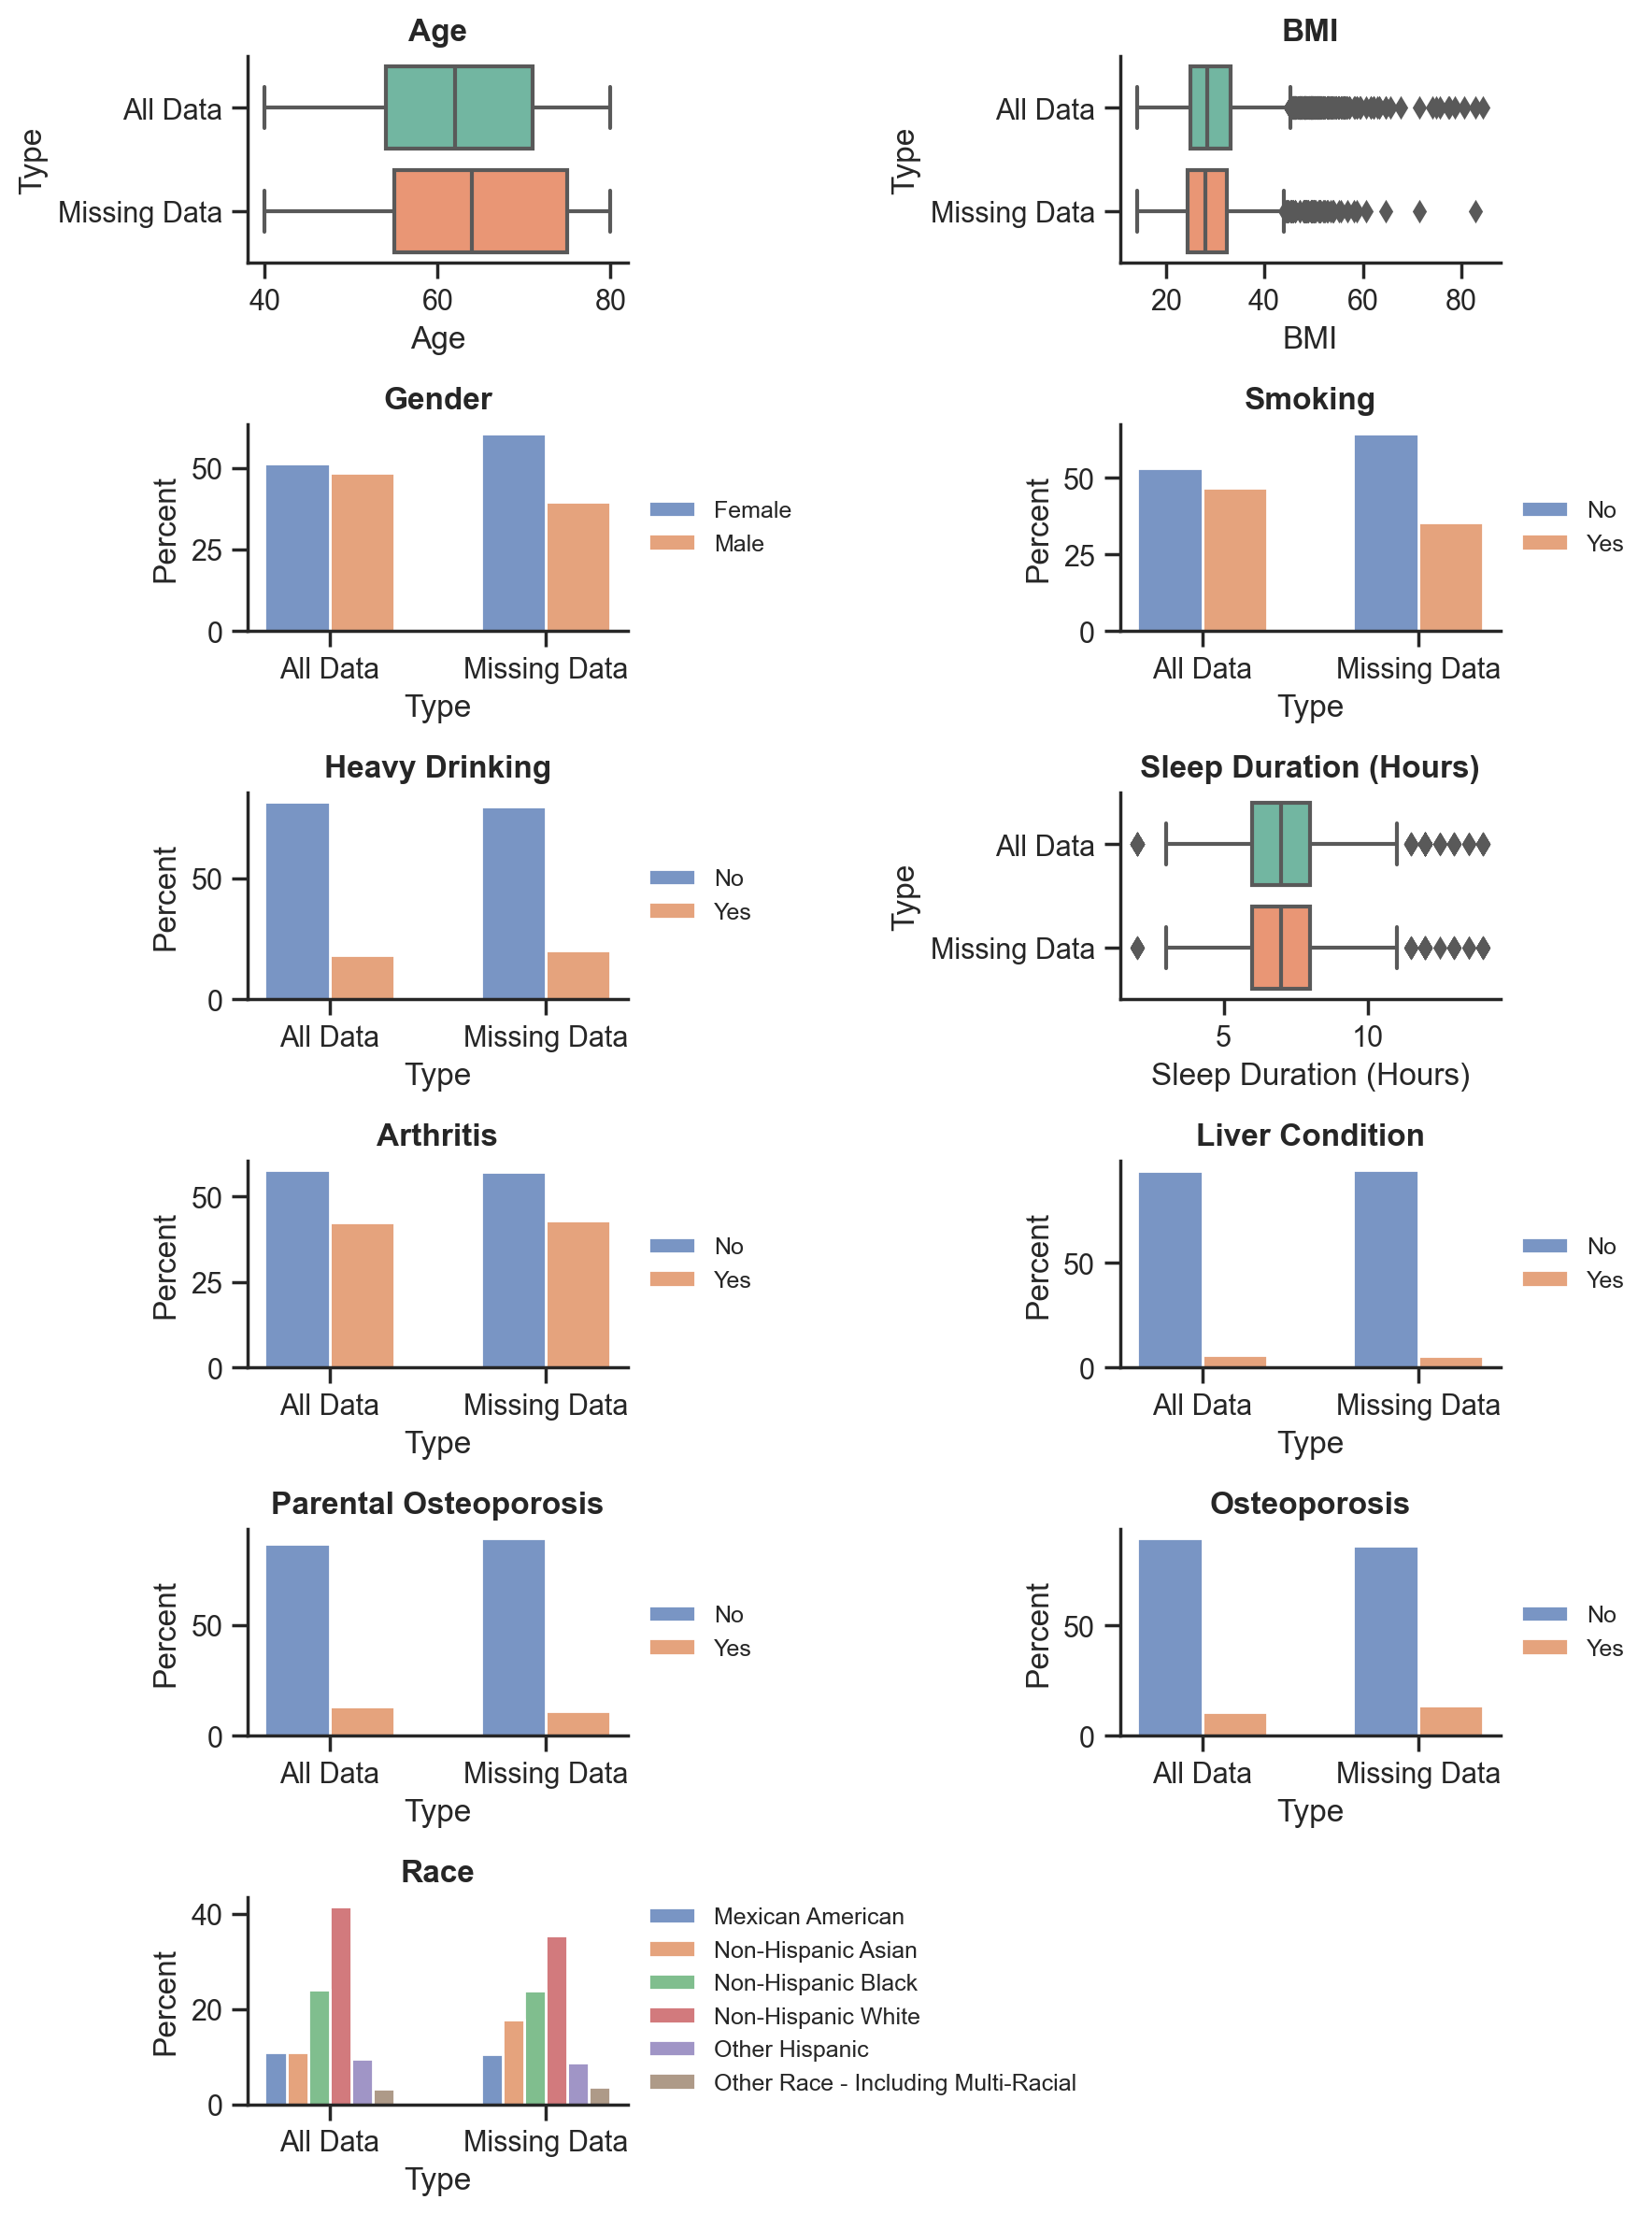

In [31]:
# all data
all_data = df_merged_all.copy()
all_data['Type'] = 'All Data'

# missing data
missing_data = df_merged_all[df_merged_all.isnull().values.any(axis=1)]
missing_data['Type'] = 'Missing Data'

# combined all data and missing values
comparison = pd.concat([all_data, missing_data])
comparison = comparison.reset_index()
comparison.drop(columns=['index'], inplace=True)

# histplot of all data vs. missing data
plt.figure(figsize=(9, 12))
# plot by desired order
var_list = ['Age', 'BMI', 'Gender', 'Smoking', 
            'Heavy Drinking', 'Sleep Duration (Hours)', 'Arthritis', 
            'Liver Condition', 'Parental Osteoporosis', 'Osteoporosis', 'Race']
compare_distribution(data=comparison, compare_col='Type', var_list=var_list)

The distribution of all data and missing data is very similar, direct removal of missing data should not cause too much bias.

In [32]:
# remove missing values
df_merged_all = df_merged_all.dropna()
df_merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6144 entries, 0 to 25734
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     6144 non-null   float64 
 1   Gender                  6144 non-null   category
 2   Race                    6144 non-null   category
 3   BMI                     6144 non-null   float64 
 4   Smoking                 6144 non-null   category
 5   Heavy Drinking          6144 non-null   category
 6   Sleep Duration (Hours)  6144 non-null   float64 
 7   Arthritis               6144 non-null   category
 8   Liver Condition         6144 non-null   category
 9   Parental Osteoporosis   6144 non-null   category
 10  Osteoporosis            6144 non-null   category
dtypes: category(8), float64(3)
memory usage: 241.1 KB


In [33]:
df_merged_all.describe()

,Age,BMI,Sleep Duration (Hours)
count,6144.000,6144.000,6144.000
mean,62.008,29.907,7.303
std,10.676,7.080,1.610
min,40.000,14.200,2.000
25%,54.000,25.200,6.000
50%,62.000,28.700,7.000
75%,70.000,33.325,8.000
max,80.000,84.400,14.000


After removing missing values, the data has 6144 rows x 11 columns. 

Next, let's deal with outliers.

### 6.3 Handling Outliers

According to the boxplots above, there are outliers for `Sleep Duration (Hours)` and `BMI`. Here are some common techniques to identify outliers:
- **Interquartile Range (IQR) Method**: identify data points that are outside the range of the lower and upper quartiles.
- **Clustering**: Clustering algorithms such as k-means or hierarchical clustering can be used to identify outliers. Outliers are data points that do not fit well within the clusters formed by the algorithm.
- **Machine learning models**: Machine learning models such as Random Forest or Support Vector Machines (SVMs) can be trained on the dataset to identify outliers. Outliers are data points that are misclassified or have a low probability of belonging to any of the classes.

In this study,  [IQR Method](https://en.wikipedia.org/wiki/Interquartile_range) is more approrpiate than clustering and machine learning models, as it's a simple and straightforward approach to identify outliers based on the distribution of the data. While those machine learning models are more complex and require more data preprocessing, such as feature scaling, and the final performance is uncertain.

**Note**: Outliers do not imply lack of value, and the outliers in this study (people with extremely abnormal weight, short or long sleep) may be the focus of other articles. They just aren't the focus of this project.

In [34]:
def get_iqr_outliers(data, features):
    data_features = data[features]
    
    # calculate the quartiles and IQR for each feature
    q1 = data_features.quantile(0.25)
    q3 = data_features.quantile(0.75)
    iqr = q3 - q1

    # calculate the lower and upper fences for each feature
    lif = q1 - 1.5 * iqr
    uif = q3 + 1.5 * iqr
    
    # identify outliers for any feature
    outliers_features = data_features[(data_features < lif) | (data_features > uif)].dropna(how='all')
    # get index of outliers
    outlier_index = list(outliers_features.index.values)
    # get values of all features of those outliers
    outliers = data.loc[outlier_index]
    
    return outliers

features = ['BMI', 'Sleep Duration (Hours)']
outliers = get_iqr_outliers(df_merged_all, features)

# remove outliers
df_merged = pd.concat([df_merged_all, outliers]).drop_duplicates(keep=False)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5831 entries, 0 to 25734
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     5831 non-null   float64 
 1   Gender                  5831 non-null   category
 2   Race                    5831 non-null   category
 3   BMI                     5831 non-null   float64 
 4   Smoking                 5831 non-null   category
 5   Heavy Drinking          5831 non-null   category
 6   Sleep Duration (Hours)  5831 non-null   float64 
 7   Arthritis               5831 non-null   category
 8   Liver Condition         5831 non-null   category
 9   Parental Osteoporosis   5831 non-null   category
 10  Osteoporosis            5831 non-null   category
dtypes: category(8), float64(3)
memory usage: 228.8 KB


After removing outliers, the # of records decreased from 6144 to 5831, with a decrease of 5%. Any potential bias by doing so? Let's compare the distribution of all data and outliers.  

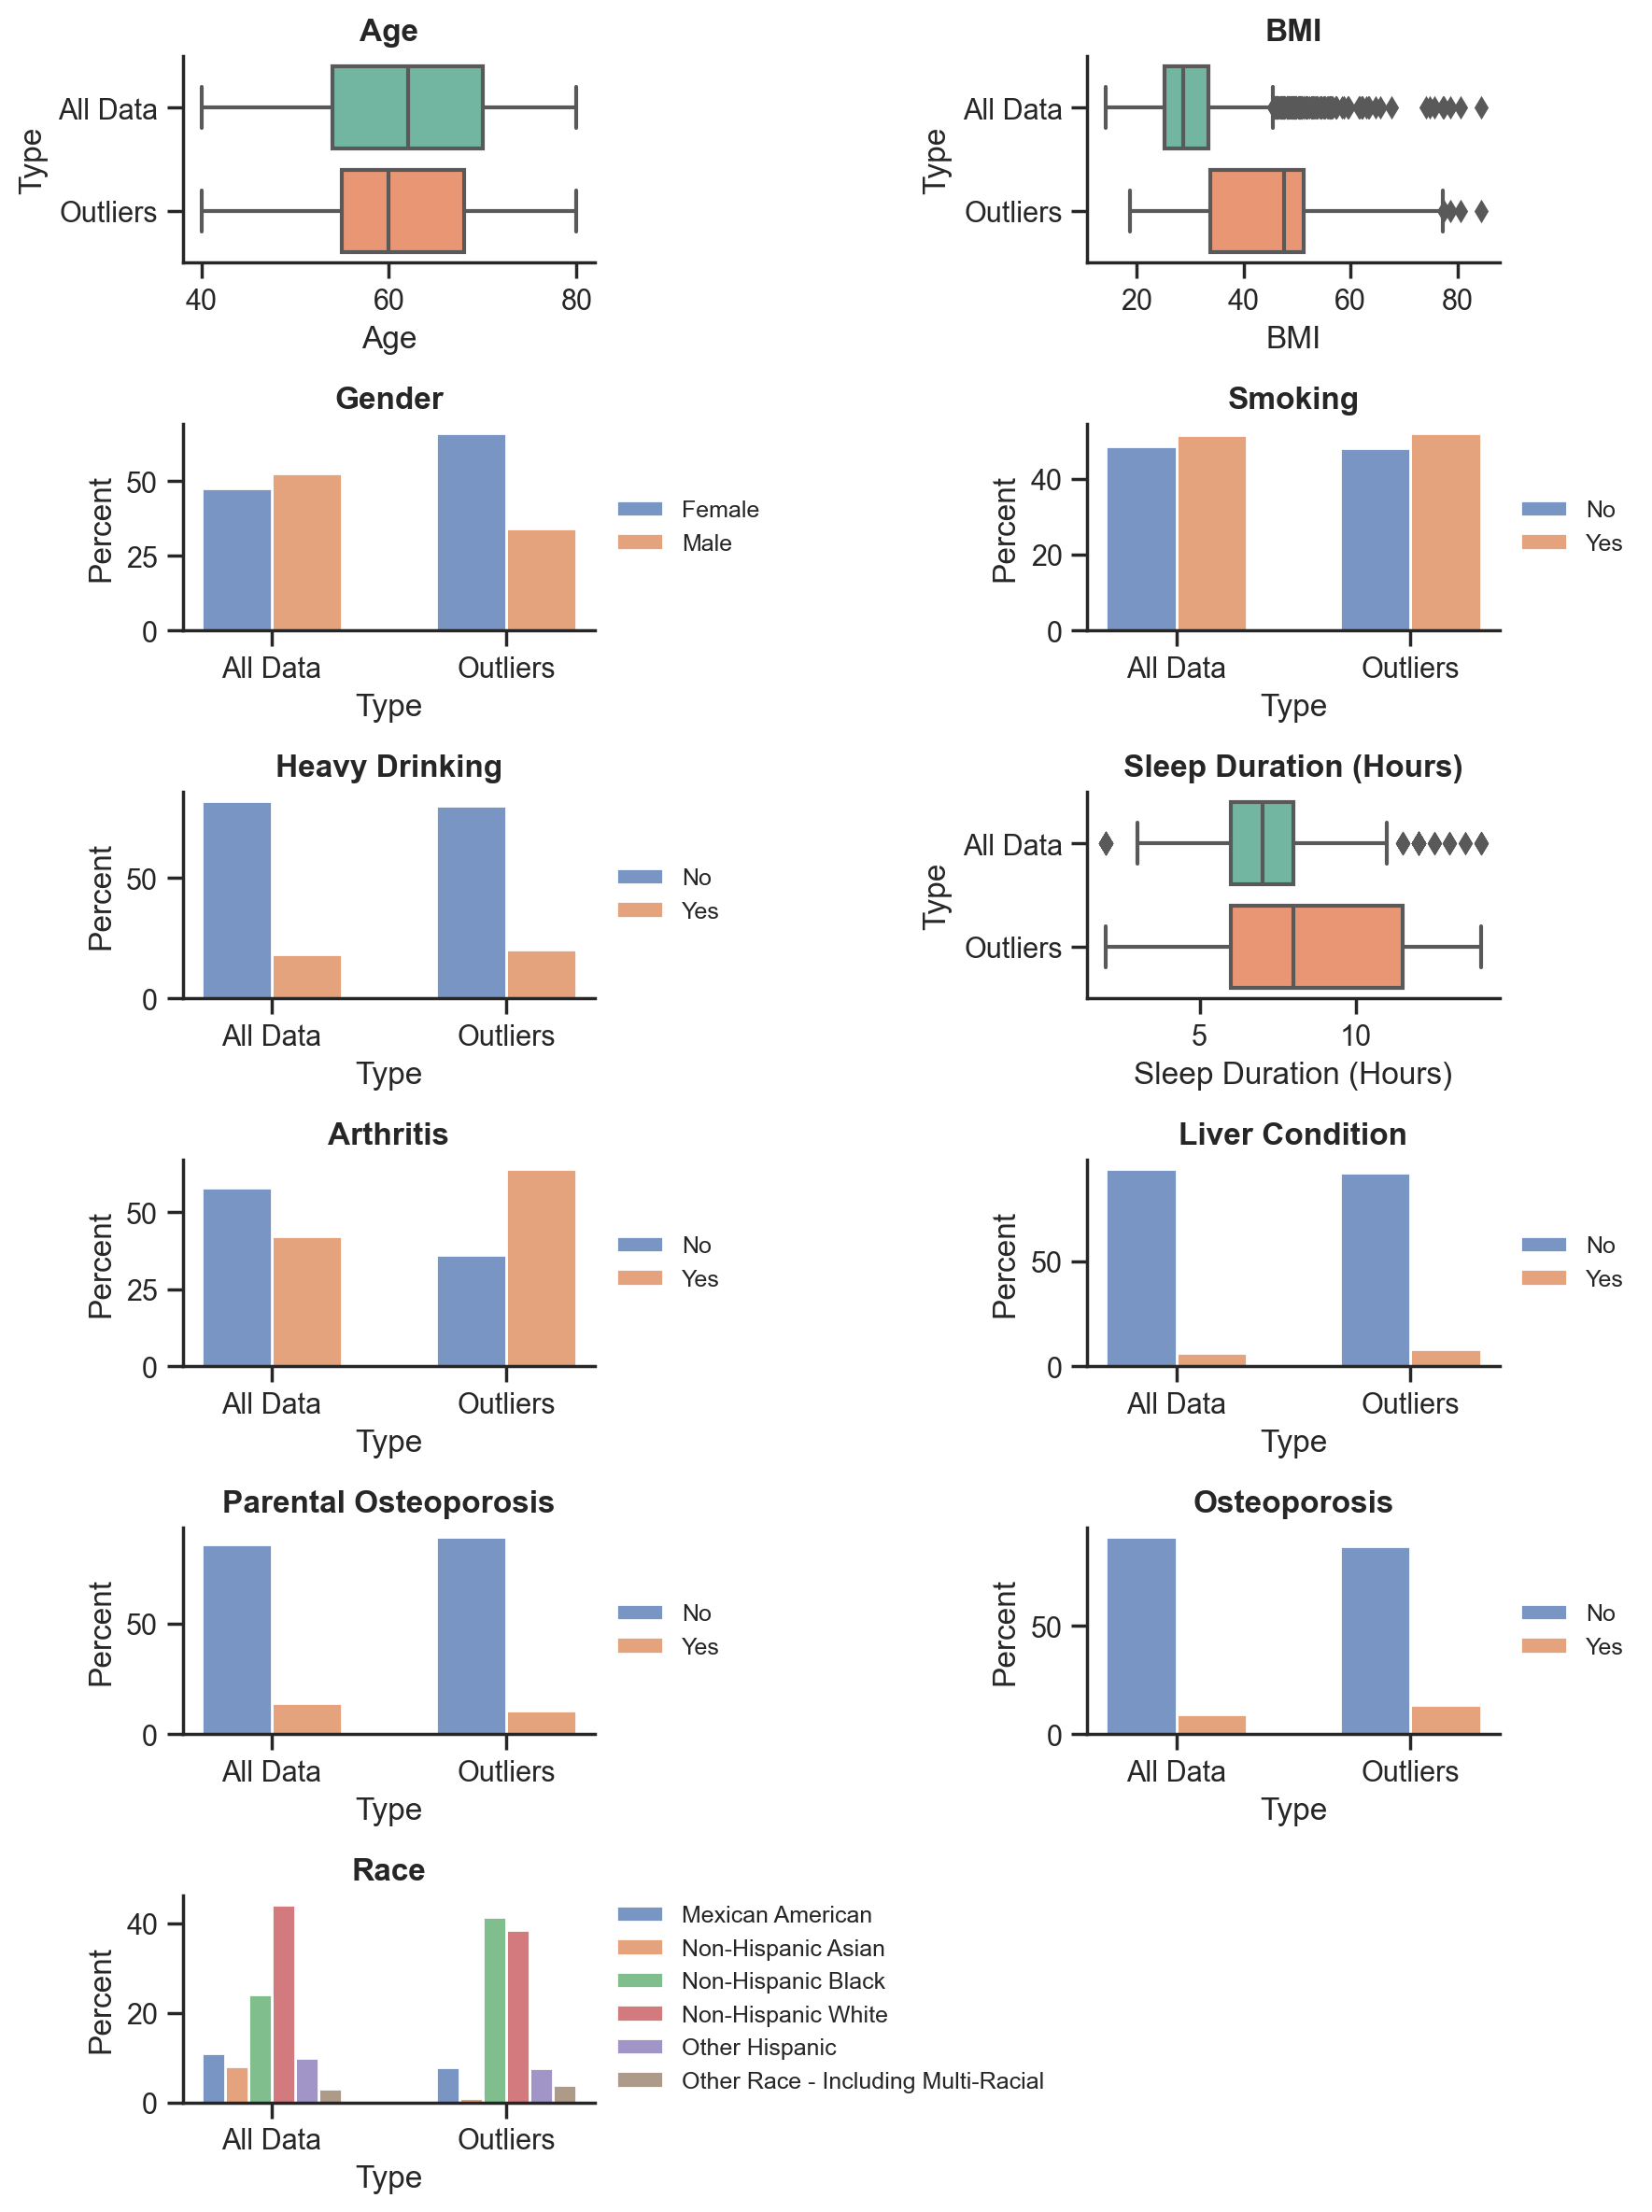

In [35]:
# Data before removing outliers
all_data = df_merged_all.copy()
all_data['Type'] = 'All Data'

# Outliers
outliers['Type'] = 'Outliers'

# combine them
comparison = pd.concat([all_data, outliers])
comparison = comparison.reset_index()
comparison.drop(columns=['index'], inplace=True)

# histplot of all data vs. missing data
plt.figure(figsize=(9, 12))
compare_distribution(comparison, compare_col='Type', var_list=var_list)

The distribution of all data and outliers for each feature is similar (except BMI and Sleep Duration, where the outliers come from), therefore we can use `df_merged`, the result after removing outliers, as our final input data.

In [36]:
# save it to .csv file
df_merged.to_csv("data/cleaned_survey.csv", index=False)

## 7. EDA

Exploratory Data Analysis (EDA) is a crucial step in machine learning, because it helps to understand the data and its underlying structure before building a model.

### 7.1 Basic Distribution of the Dataset 

We can visualize the dataset by each categorical variable to have a bettering understanding of the data.

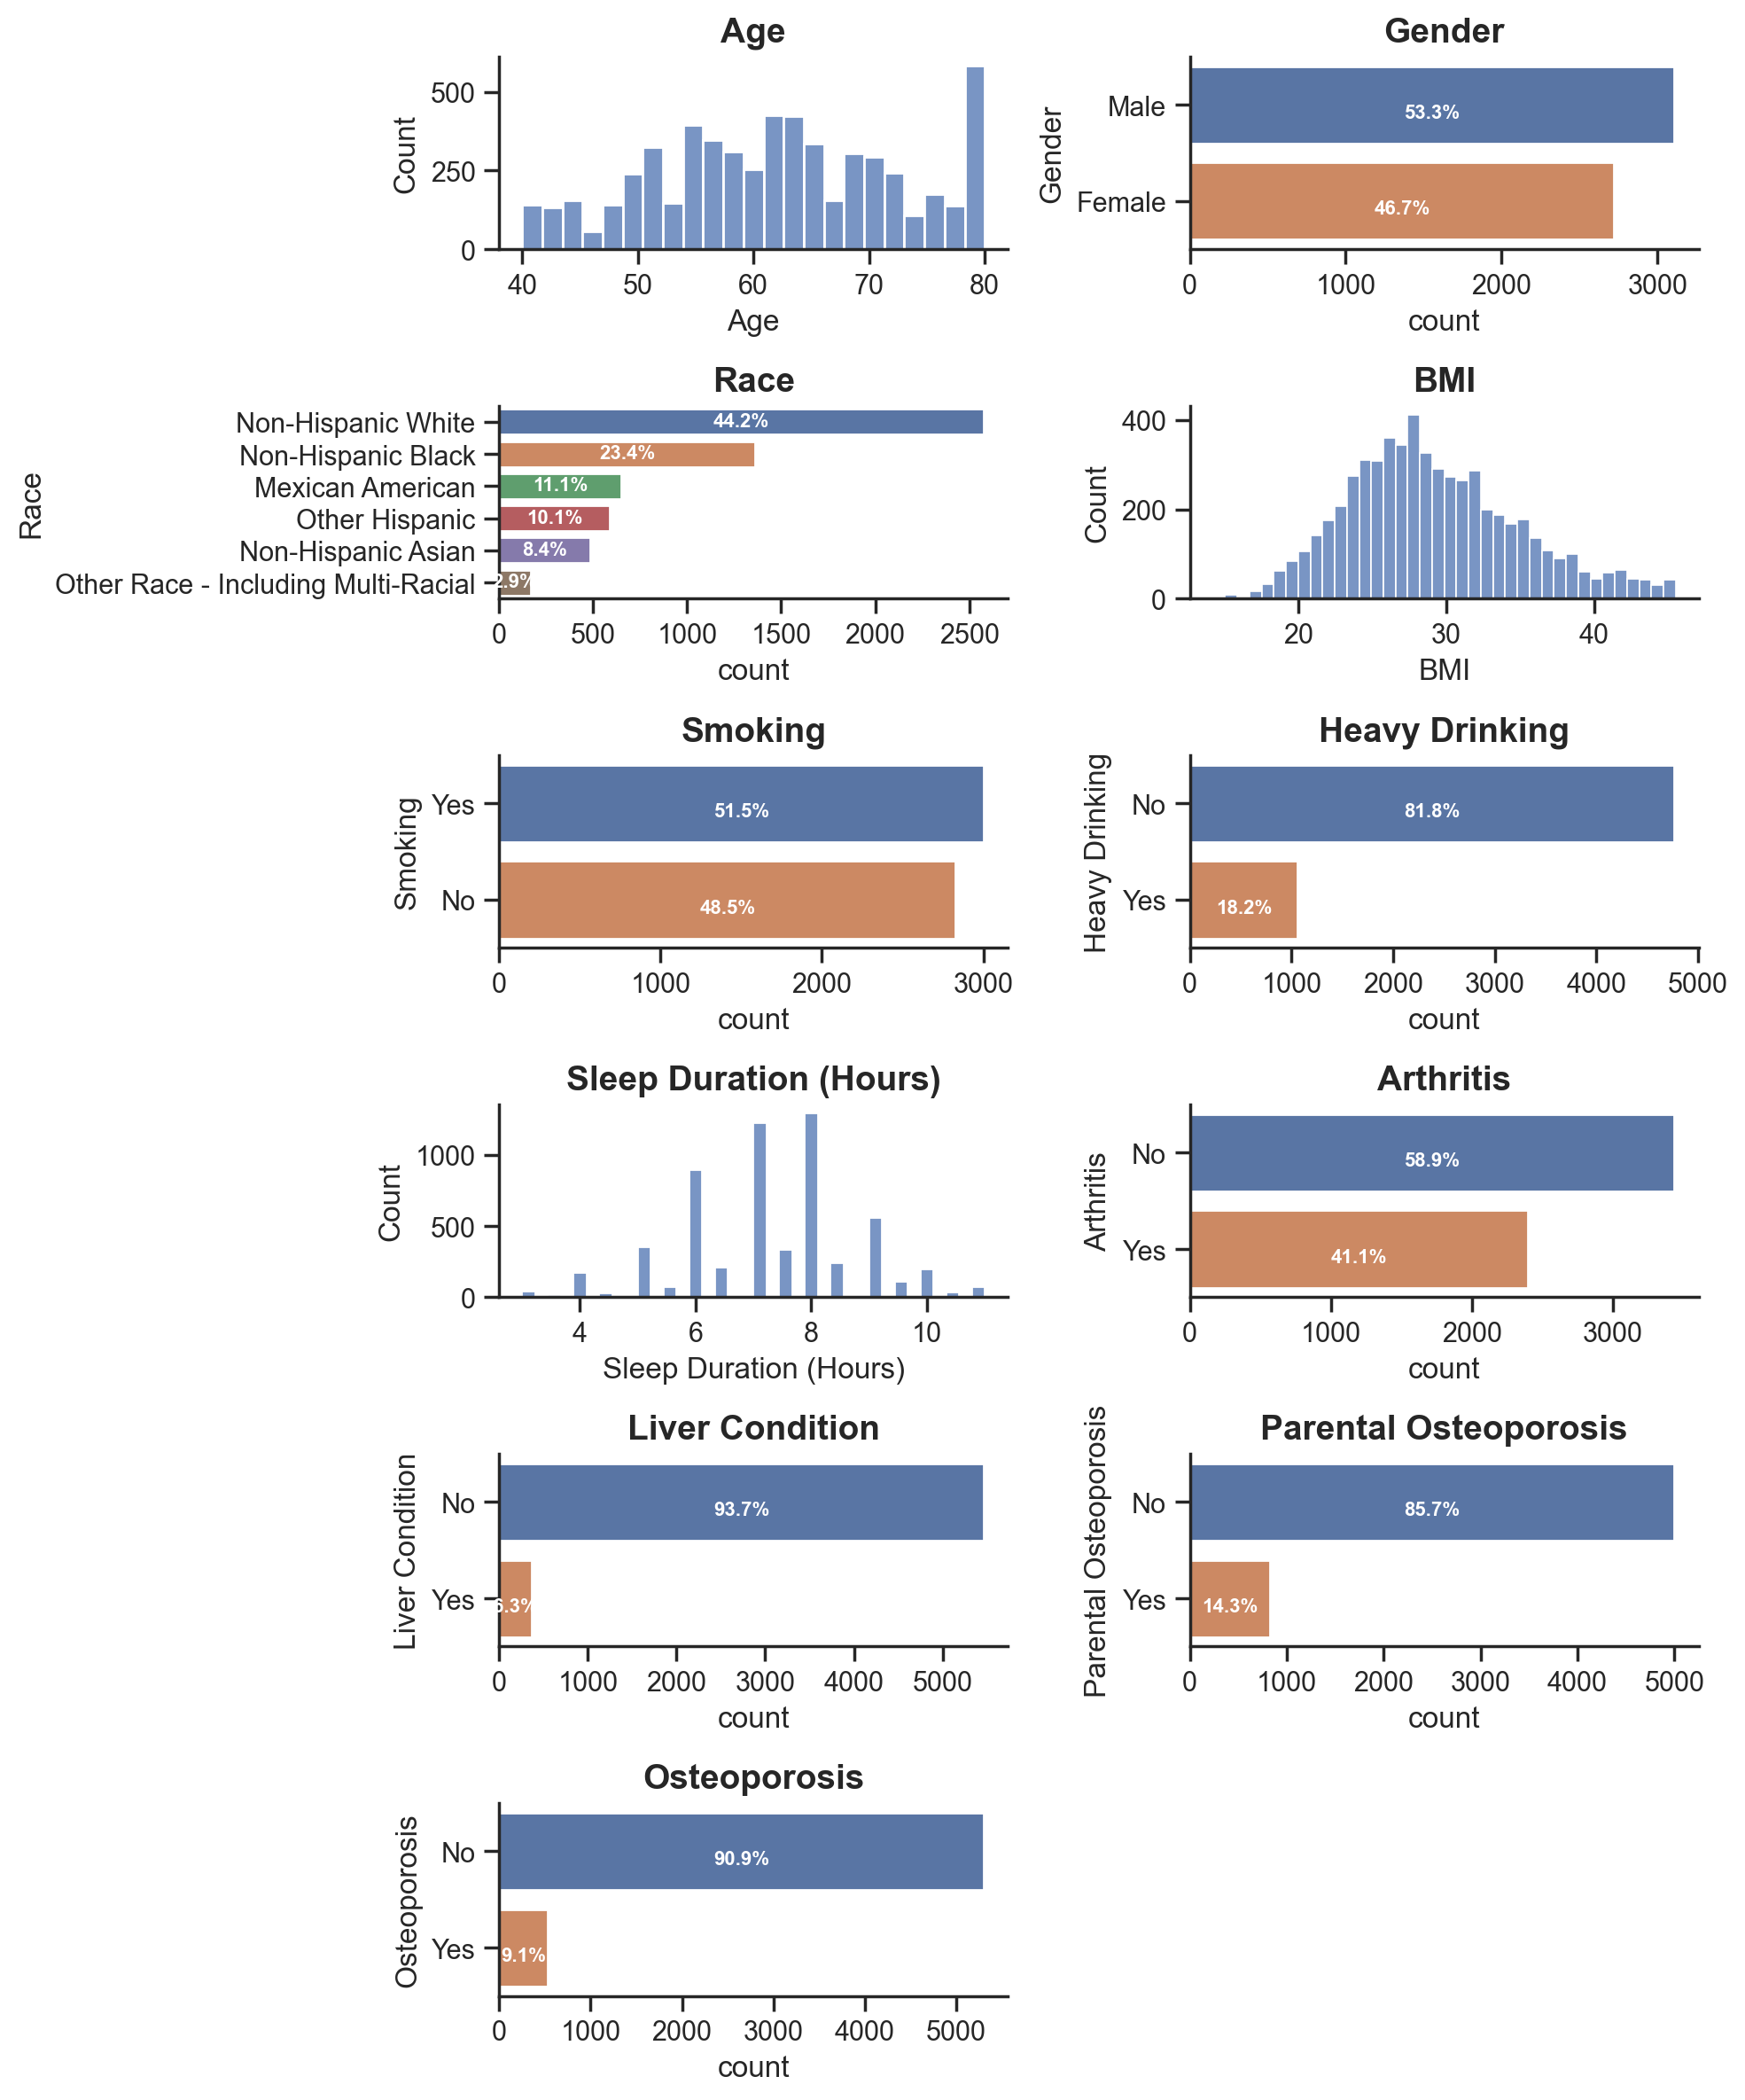

In [37]:
plt.figure(figsize=(10, 12))
multi_countplot(df_merged, var_list=df_merged.columns.tolist())

The dataset is highly imbalanced, the size of data with Osteoporosis vs. Non Osteoporosis is about 1:9, which may lead to lower sensitivity results in machine learning. We will need to handle the imbalanced data before training any models.

Next, we need to do the EDA for each independent variable. Meanwhile, it is worth noting that EDA does not account for potential confounding effects. EDA aims to provides valuable insights that can improve the accuracy and interpretability of machine learning models, while we cannot draw conclusions about the relationship between independent variable and the target. 

### 7.2 Osteoporosis by Gender

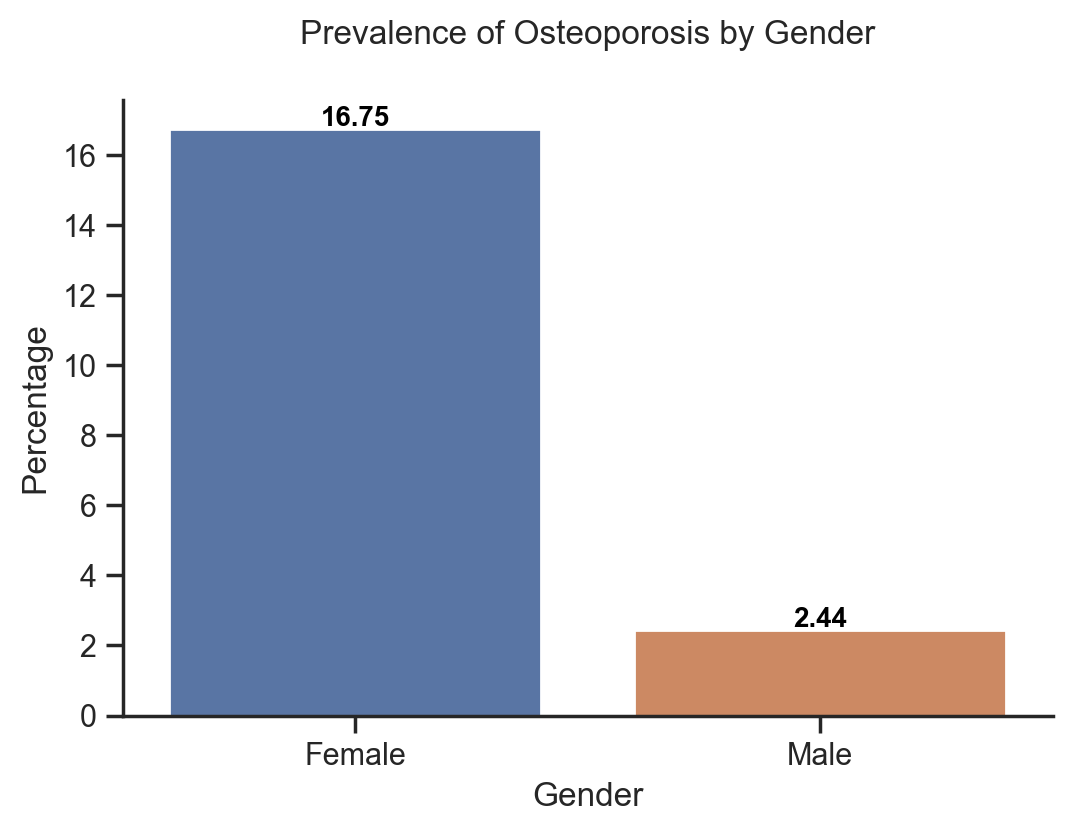

In [38]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged, 
                   var_col='Gender', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Gender')
plt.show()

In this study, women had 6.1 times the prevalence of osteoporosis compared to men.

### 7.3 Osteoporosis by Age

To simplify the analysis while still get meaningful interpretation of the data, let's group ages into 5-year intervals. For example, 40-44, 45-49, and so on. 

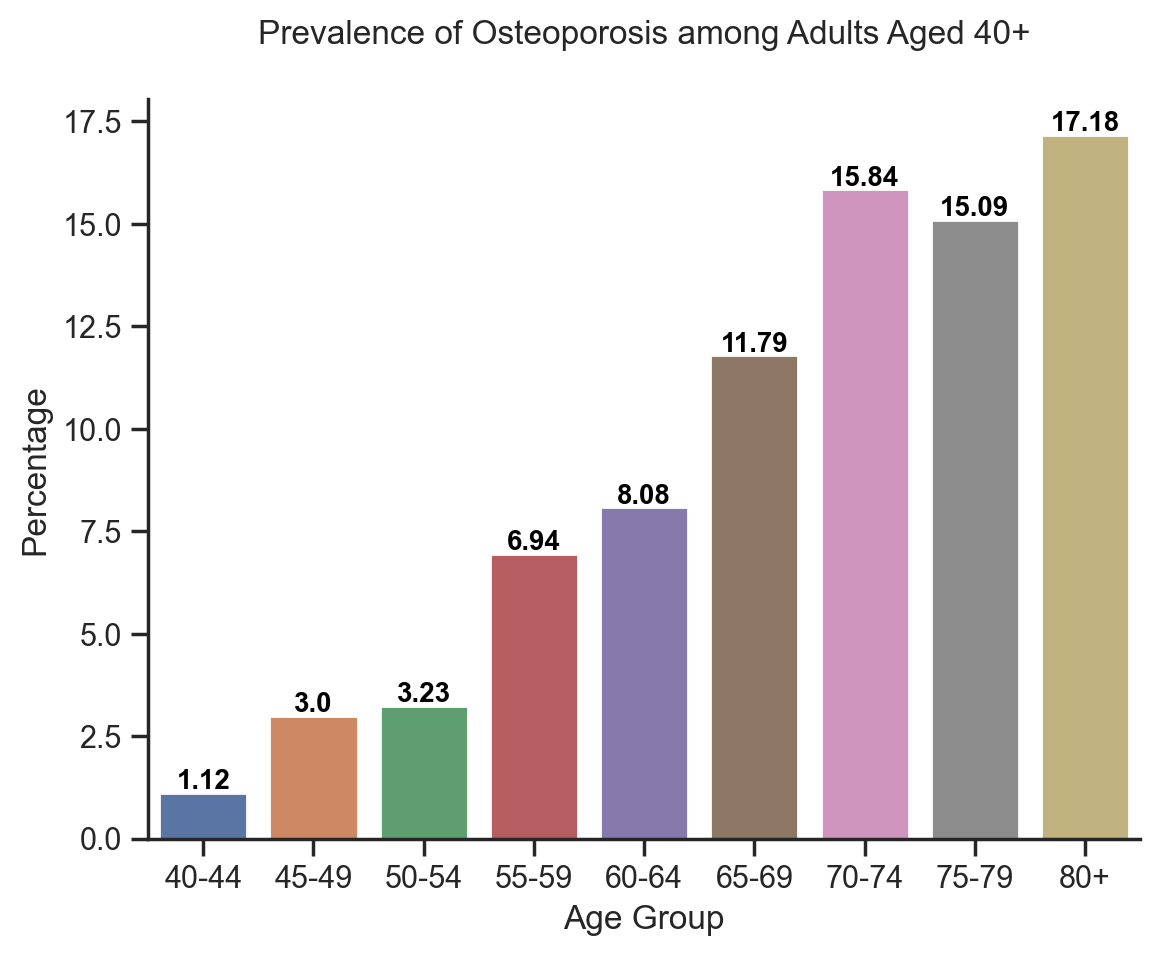

In [39]:
df_age_group = number_to_category(df_merged, var_col='Age', new_var_col='Age Group')
barplot_percentage(df_age_group, 
                   var_col='Age Group', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis among Adults Aged 40+')
plt.show()

The prevalence of osteoporosis increases with age.

### 7.4 Osteoporosis by Race

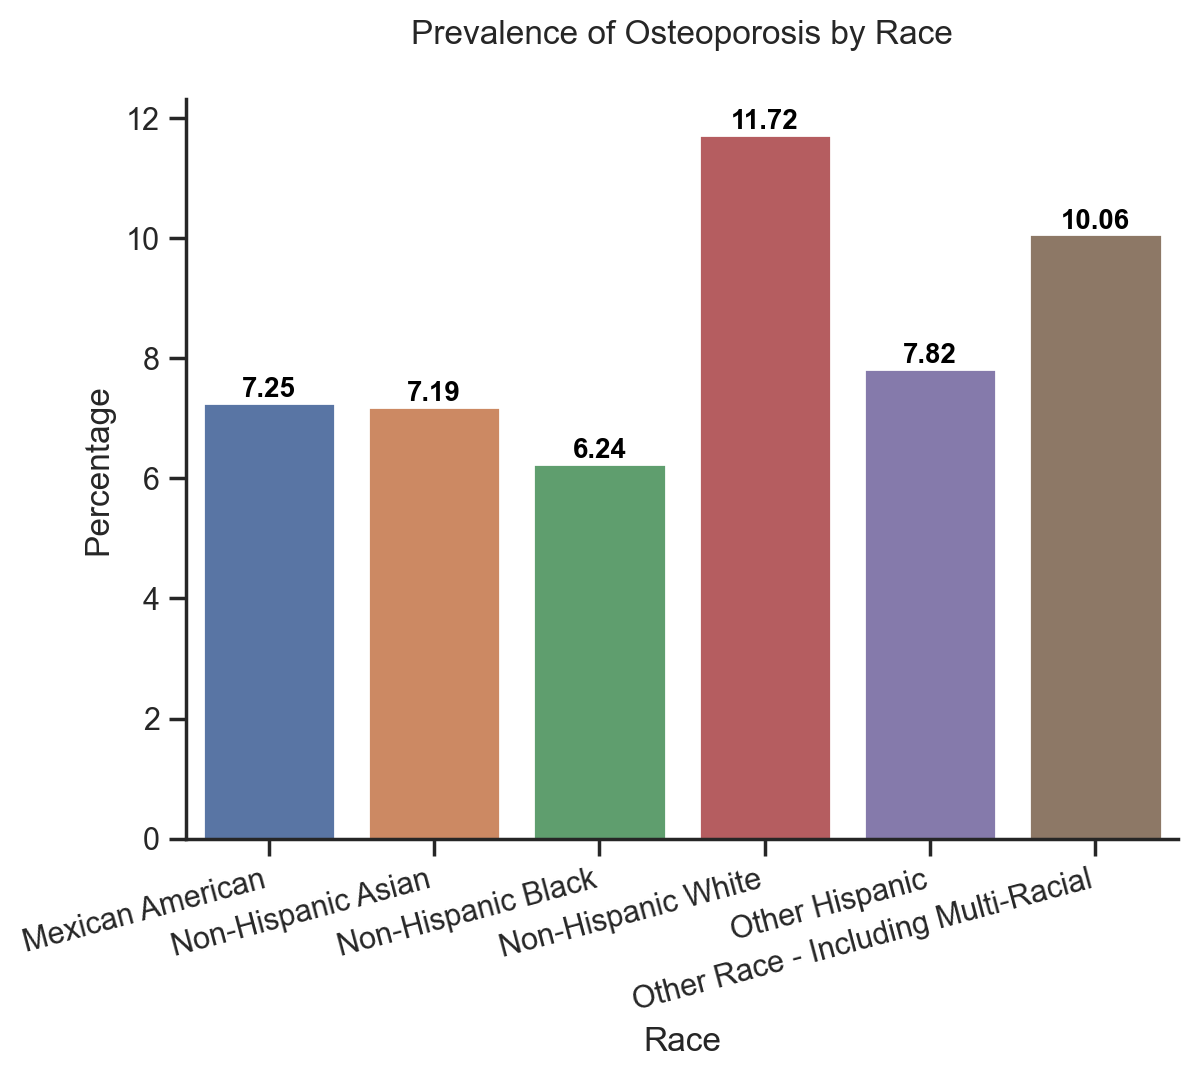

In [40]:
ax = barplot_percentage(df_merged, 
                   var_col='Race', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Race')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, horizontalalignment='right')
plt.show()

The prevalence among Non-Hispanic White and Other Race are higher.

### 7.5 Osteoporosis by BMI

According to [CDC](https://www.cdc.gov/obesity/basics/adult-defining.html), BMI can be interpreated to 4 groups: 
- Underweight (below 18.5)
- Healthy Weight (18.5 <= BMI < 25)
- Overweight (25.0 <= BMI < 30)
- Obesity (30.0 or higher)

Are those groups have different prevalence rates?

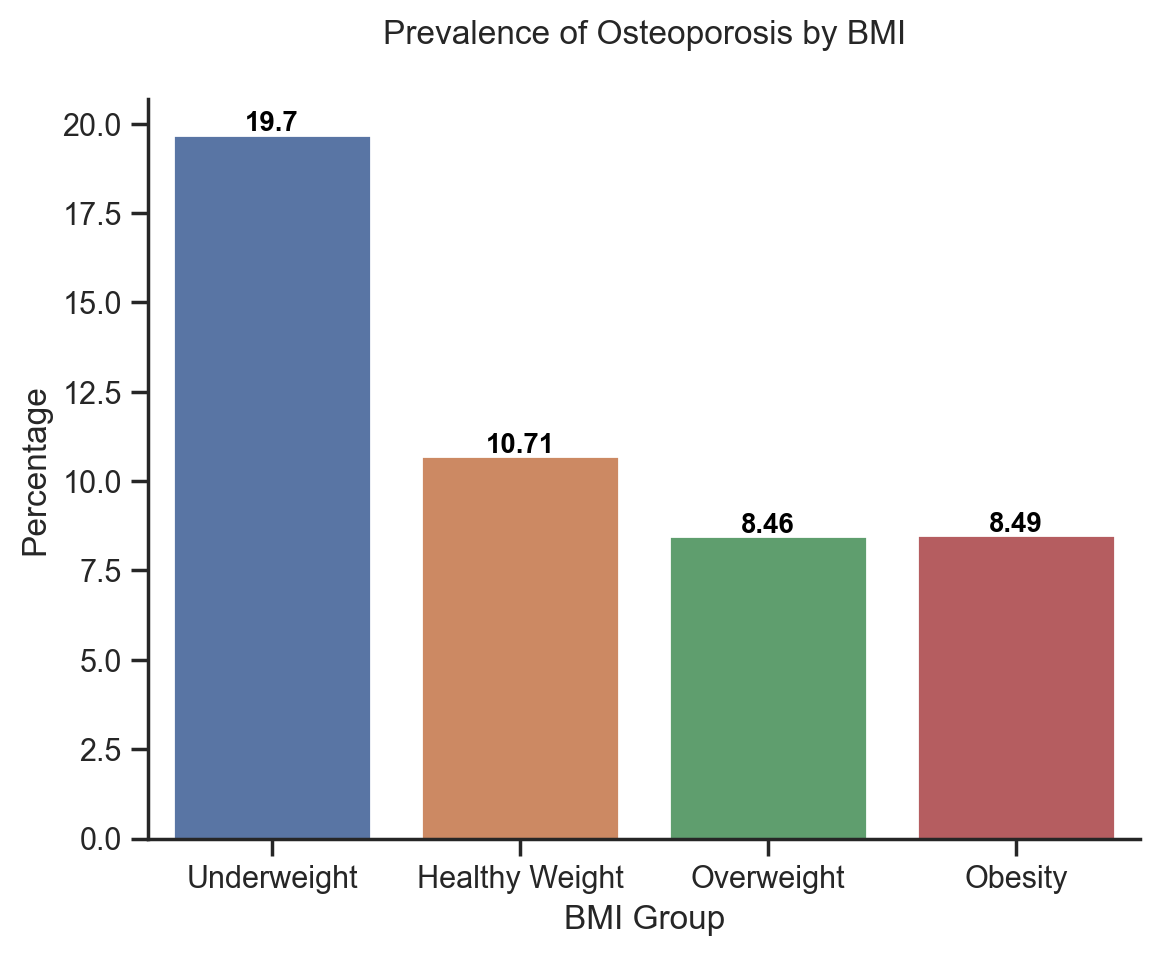

In [41]:
df_bmi_group = number_to_category(df_merged, var_col='BMI', new_var_col='BMI Group')
bmi_order = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']
barplot_percentage(df_bmi_group,
                   var_col='BMI Group', 
                   target_col='Osteoporosis',
                   order = bmi_order,
                   title='Prevalence of Osteoporosis by BMI')
plt.show()

Osteoporosis was associated with underweight. Underweight people had 63% higher risk of Osteoporosis when compared to healthy weight people.

### 7.6 Osteoporosis by Alcohol

Alcohol data on "Heavy Drinking" are answers to the question "Ever have 4/5 or more drinks every day". According to the [National Institute on Alcohol Abuse and Alcoholism](https://www.niaaa.nih.gov/alcohol-health/overview-alcohol-consumption/moderate-binge-drinking), heavy drinking is defined as consuming more than 4 drinks on any day for men, or consuming more than 3 drinks on any day or women.

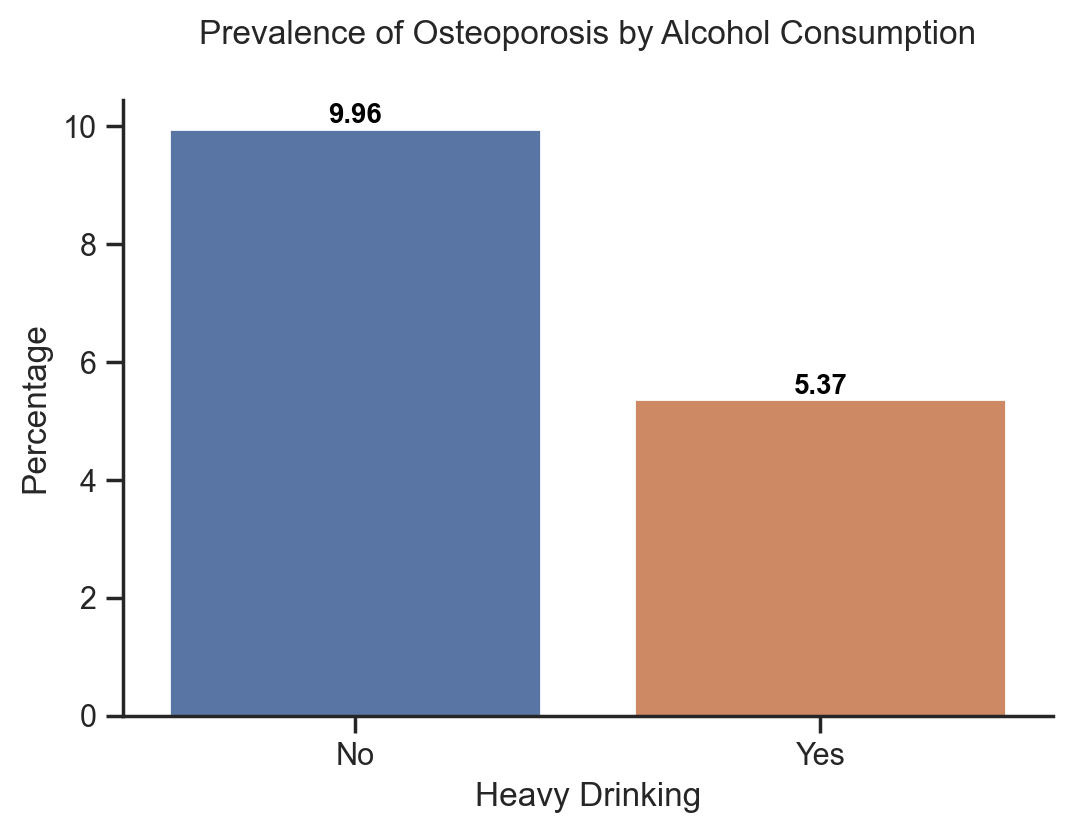

In [42]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Heavy Drinking',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Alcohol Consumption'
                  )
plt.show()

The risk of getting osteoporosis for people who never had 4/5 or more drinks every day was 1.65 times the risk for those who ever had. This result is somewhat inconsistent with the common sense that alcohol is harmful to health. But we cannot draw any conclusion yet, further study about confounding effects is needed.

### 7.7 Osteoporosis by Smoking

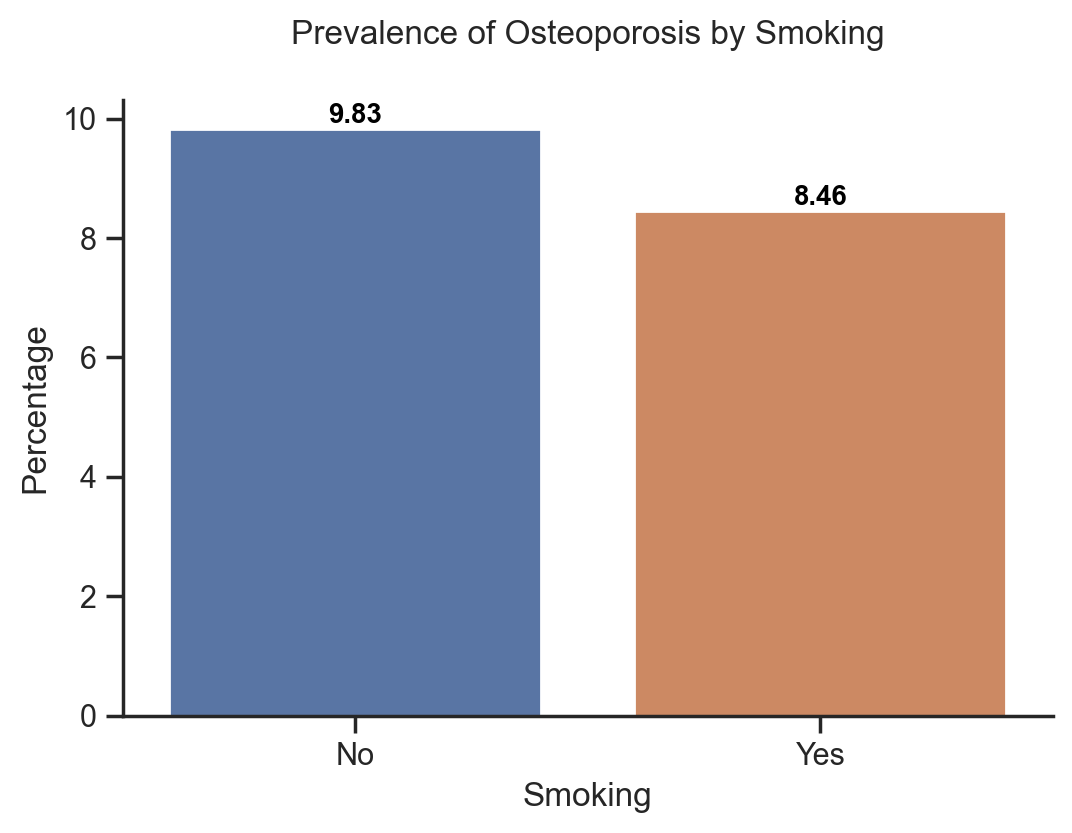

In [43]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Smoking',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Smoking'
                  )
plt.show()

The risk for people who didn't smoke was 1.1 times the risk for those who smoked. Again, it's not the final conclusion, further study about confounding effects is needed.

### 7.8 Osteoporosis by Sleep Duration

Similar to `Age`, we need to group people by `Sleep Duration` to better understand the potential relationship between sleeping and osteoporosis.

According to [CDC](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html), adults need 7-8 or 7-9 hours of sleep per night, while oversleeping (more than 9 hours) could also be problematic according to an article about [oversleeping](https://www.hopkinsmedicine.org/health/wellness-and-prevention/oversleeping-bad-for-your-health).

Therefore, let's create 3 groups for sleep duration:
- Less than 7 Hours
- 7-9 Hours
- More than 9 Hours

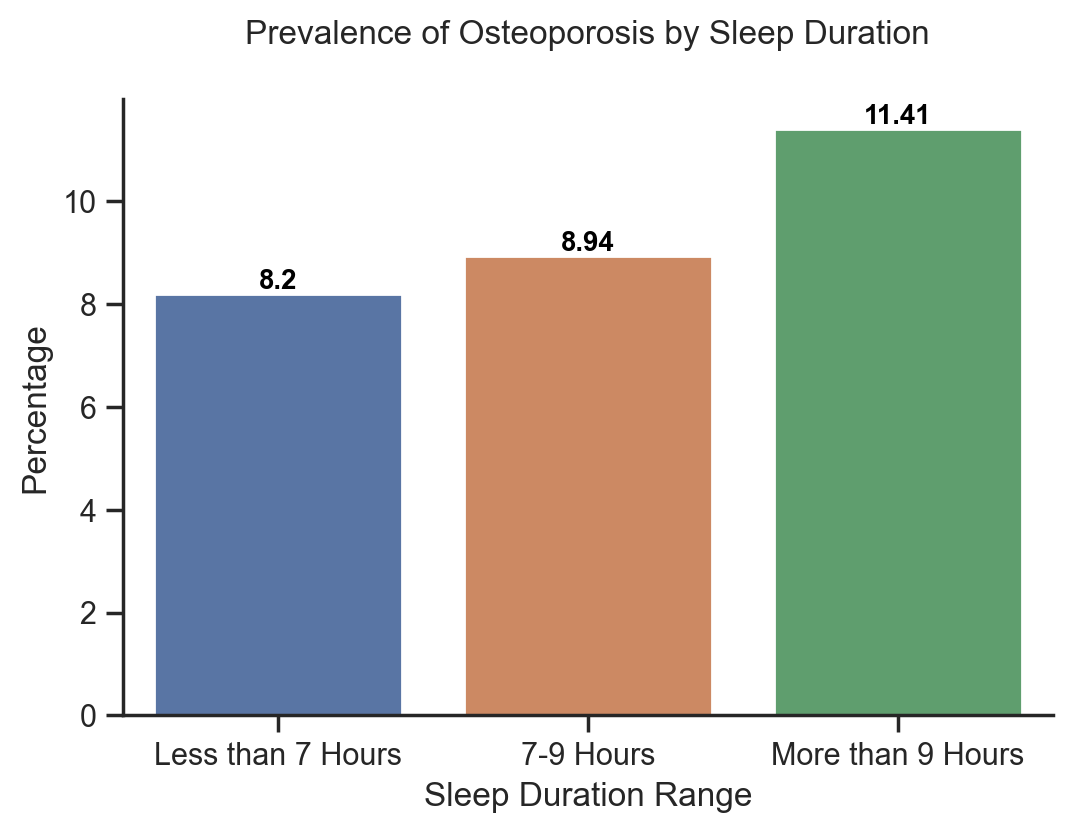

In [44]:
df_sleep_group = number_to_category(df_merged, var_col='Sleep Duration (Hours)', new_var_col='Sleep Duration Range')
sleep_order = ['Less than 7 Hours', '7-9 Hours', 'More than 9 Hours']
plt.figure(figsize=(6, 4))
barplot_percentage(df_sleep_group, 
                   var_col='Sleep Duration Range', 
                   target_col='Osteoporosis',
                   order = sleep_order,
                   title='Prevalence of Osteoporosis by Sleep Duration')
plt.show()

Interestingly, people who slept less than than 7 hours per night had lower prevalence of osteoporosis. It might be worth doing some statistical analysis, such as the age-adjusted prevalence, in the future.


### 7.9 By Arthritis

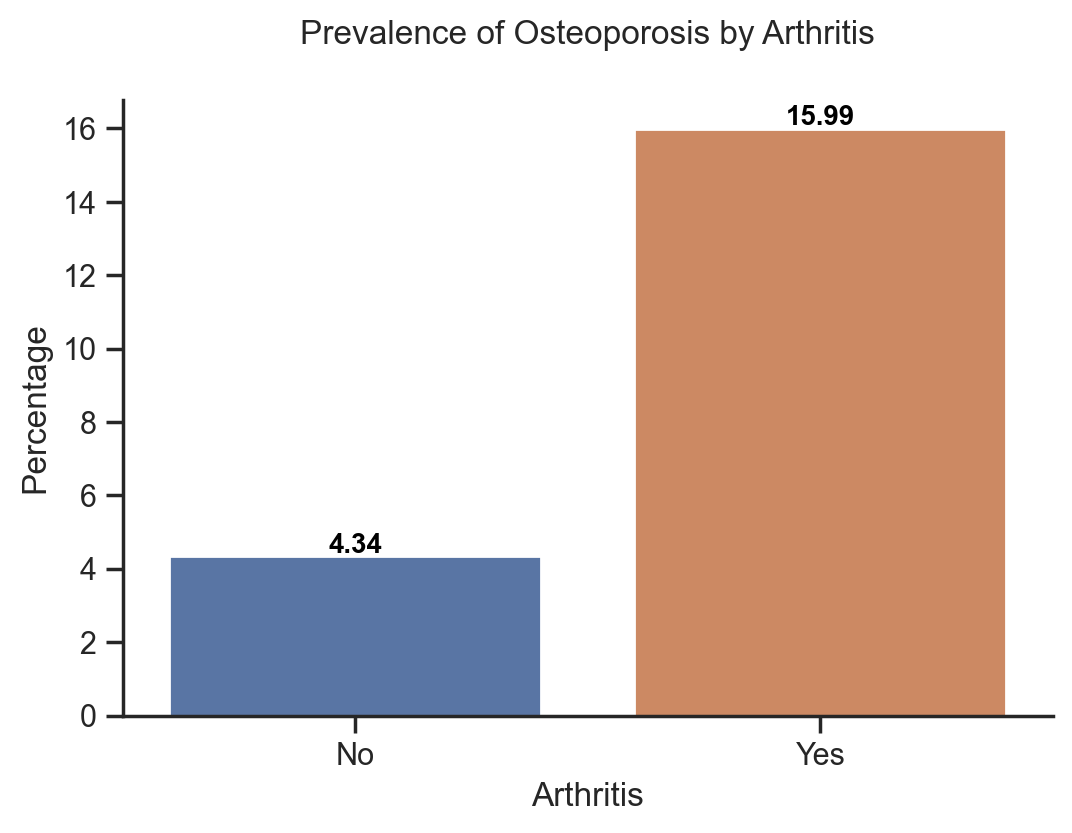

In [45]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Arthritis',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Arthritis'
                  )
plt.show()

### 7.10 By Liver Condition

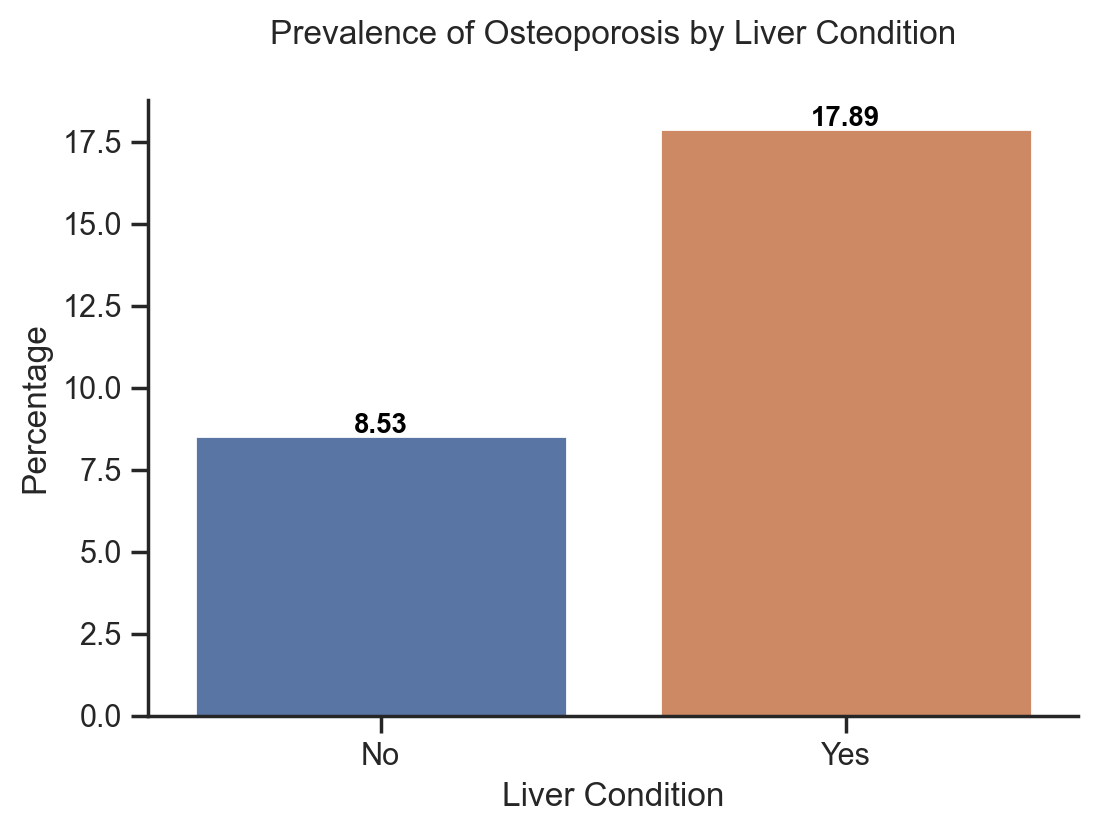

In [46]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Liver Condition',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Liver Condition'
                  )
plt.show()

### 7.11 By Parental Osteoporosis

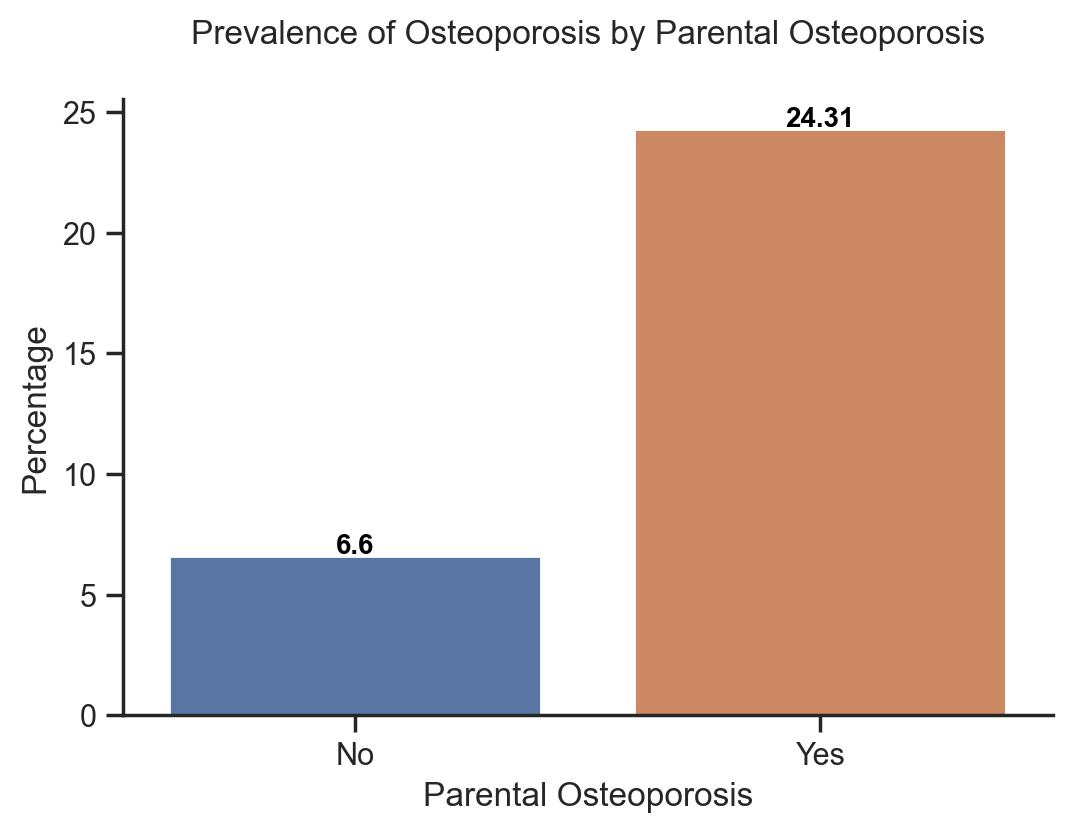

In [47]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Parental Osteoporosis',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Parental Osteoporosis'
                  )
plt.show()

## 8. Feature Engineering

When there are many independent features, feature engineering may include removing some less useful features, which we are not going to do in this project. Because there are only 10 features, and each feature may have important practical significance. More specifically, in this project, feature engineering includes:
- Convert categorical variables to numbers so the data can be applied to machine learning algorithms
- Decide whether to select the numeric features `Age`, `BMI`, `Sleep Duration (Hours)`, or the corresponding binned features (age group, bmi group, and sleep duration group) as shown in EDA.

### 8.1 Categorical Encoding

Before applying any machine learning algorithm, we need to convert categorical variables into numbers, this process is called categorical encoding. Let's use [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to encode nominal categories.

In [48]:
def one_hot_encode(data):
    cate_list = list(data.select_dtypes(include=['category', 'object']).columns)
    data_encoded = pd.get_dummies(data, columns=cate_list, prefix_sep='_')
    # drop columns end with '_No'
    data_encoded = data_encoded[data_encoded.columns.drop(list(data_encoded.filter(regex='_No$')))]
    # remove '_Yes', 'Gender_', and 'Race_' from column names
    data_encoded.columns = data_encoded.columns.str.replace("_Yes|Gender_|Race_", "")
    # drop redundant columns to reduce the impact of multicollinearity
    data_encoded = data_encoded.drop(columns=['Male', 'Other Race - Including Multi-Racial'])
    
    return data_encoded


df_ohe = one_hot_encode(df_merged)

df_ohe.head()

,Age,BMI,Sleep Duration (Hours),Female,Mexican American,Non-Hispanic Asian,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Smoking,Heavy Drinking,Arthritis,Liver Condition,Parental Osteoporosis,Osteoporosis
0,69.0,26.7,7.0,0,0,0,1,0,0,1,1,1,0,0,0
1,54.0,28.6,9.0,0,0,0,0,1,0,1,1,0,0,0,0
2,72.0,28.9,8.0,0,0,0,0,1,0,1,0,0,0,0,1
4,73.0,19.7,9.0,1,0,0,0,1,0,0,0,1,0,0,0
5,56.0,41.7,5.0,0,1,0,0,0,0,1,0,1,0,0,0


### 8.2 Binning

In the EDA, we've explored the osteoporosis prevalence by `Age`, `BMI`, and `Sleep Duration (Hours)` by binning them. Let's encode those ordinal categories to prepare for calculating mutual information.

In [49]:
# binning age with 5-year interval
def convert_age(data):
    group = 1
    for x in range(45, 80, 5):
        group += 1
        if x <= data <= x+4:
             return group
    return 0

# binning bmi based on BMI level 
def convert_bmi(data):
    group = 1
    if 18.5 <= data < 25:
        group = 2
    if 25 <= data < 30:
        group = 3
    if data >= 30:
        group = 4
        
    return group

# binning sleep duration
def convert_sleep_hours(data):
    group = 1
    if 7 <= data < 9:
        group = 2
    if data > 9:
        group = 3
        
    return group

df_ohe['Age Group'] = df_merged['Age'].apply(convert_age)
df_ohe['BMI Group'] = df_merged['BMI'].apply(convert_bmi)
df_ohe['Sleep Duration Group'] = df_merged['Sleep Duration (Hours)'].apply(convert_sleep_hours)

### 8.2 Mutual Information

We can select featues according to the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) score. A higher score indicates a stronger connection between the feature and the target, while a low score (closer to 0) indicates a weaker connection between the feature and the target.

In [50]:
# get mutual information scores
mi_scores = make_mi_scores(data=df_ohe, target_name="Osteoporosis")
mi_scores

Female                    3.317e-02
Arthritis                 1.968e-02
Parental Osteoporosis     1.784e-02
Age                       1.422e-02
Age Group                 1.064e-02
Non-Hispanic White        3.191e-03
Liver Condition           2.553e-03
Heavy Drinking            2.122e-03
Non-Hispanic Black        1.650e-03
BMI Group                 1.121e-03
Smoking                   2.808e-04
Mexican American          2.797e-04
Non-Hispanic Asian        2.196e-04
Other Hispanic            1.191e-04
Sleep Duration Group      4.428e-05
BMI                       0.000e+00
Sleep Duration (Hours)    0.000e+00
Name: MI Scores, dtype: float64

`Age Group` has lower score than `Age`. while `Sleep Hours Group` and `BMI Group` have higher mutual information scores than the original feature. Therefore we can remove `BMI` and `Sleep Hours` and keep the 2 binning features.

In [51]:
# keep Age, BMI Group, Sleep Duration Group, delete Age Group, BMI, and Sleep Duration
df_ohe = df_ohe.drop(columns=['Age Group', 'BMI', 'Sleep Duration (Hours)'])

In [52]:
df_ohe.head()

,Age,Female,Mexican American,Non-Hispanic Asian,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Smoking,Heavy Drinking,Arthritis,Liver Condition,Parental Osteoporosis,Osteoporosis,BMI Group,Sleep Duration Group
0,69.0,0,0,0,1,0,0,1,1,1,0,0,0,3,2
1,54.0,0,0,0,0,1,0,1,1,0,0,0,0,3,1
2,72.0,0,0,0,0,1,0,1,0,0,0,0,1,3,2
4,73.0,1,0,0,0,1,0,0,0,1,0,0,0,2,1
5,56.0,0,1,0,0,0,0,1,0,1,0,0,0,4,1


### 8.3 Correlation Matrix

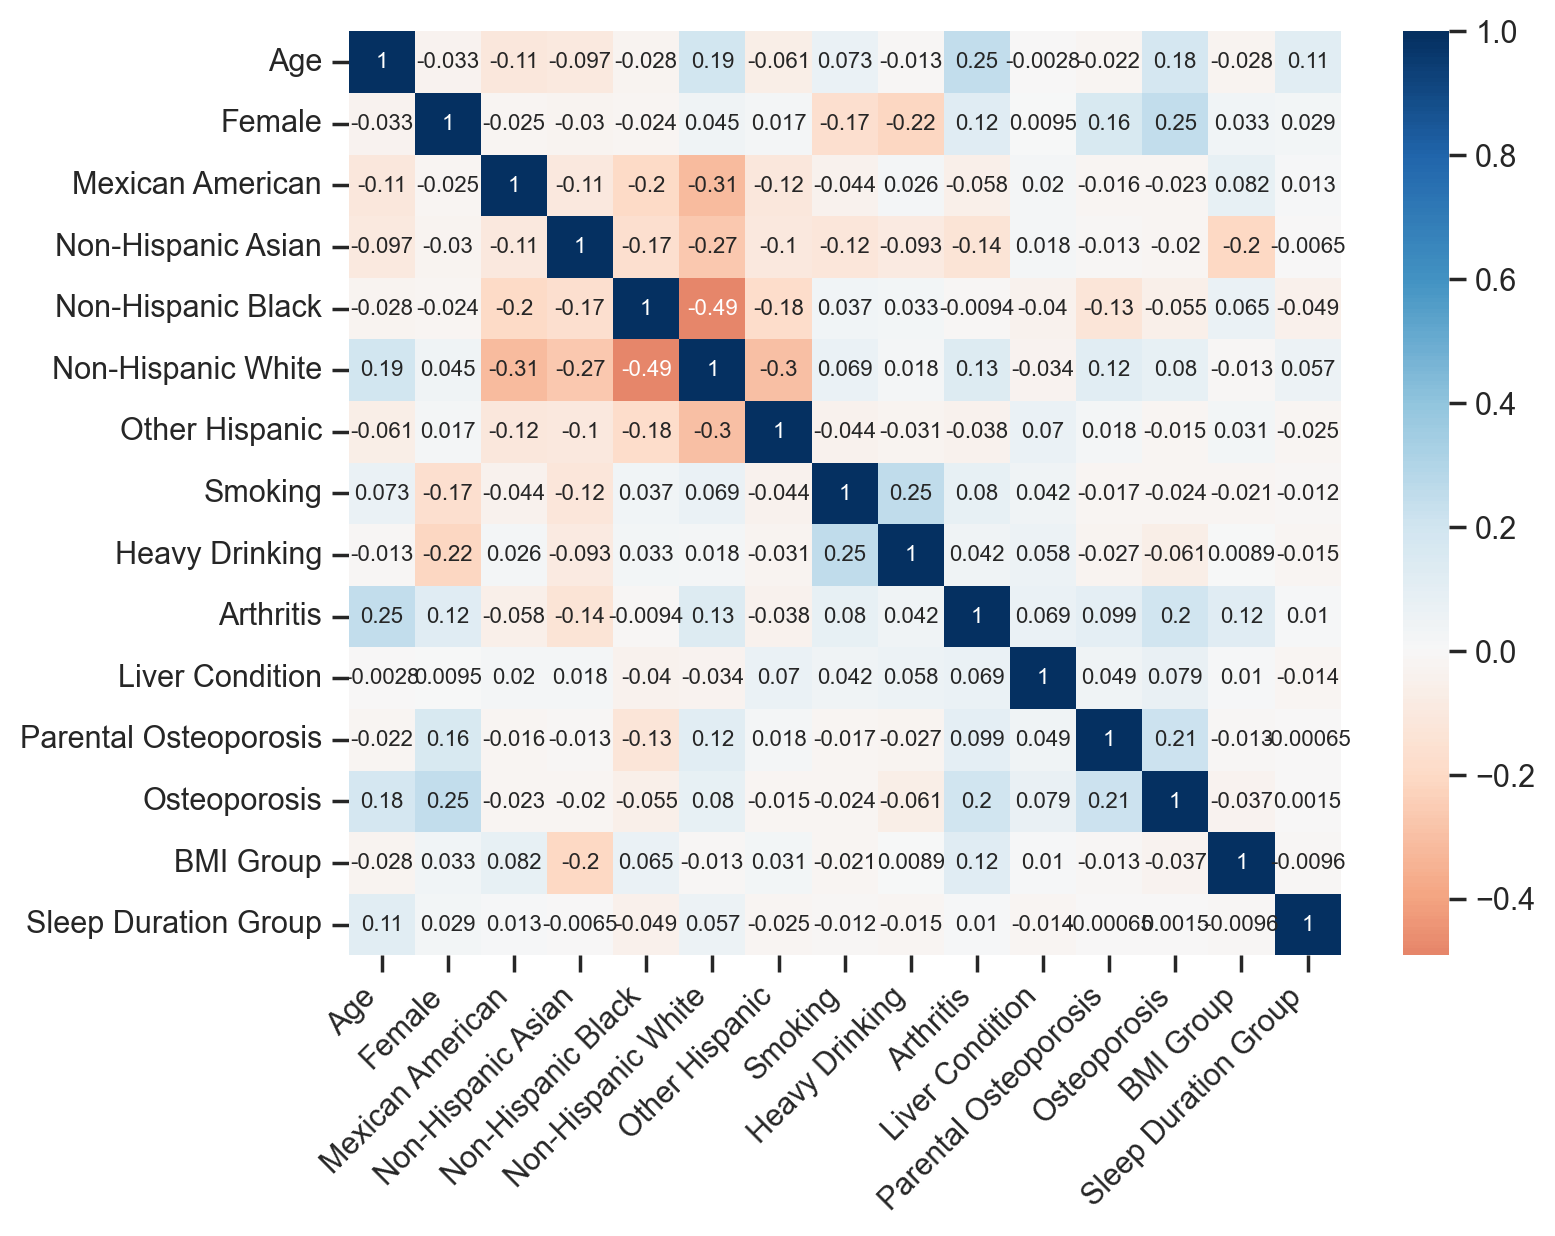

In [53]:
plt.figure(figsize=(8, 6))
chart = sns.heatmap(data=df_ohe.corr(), annot=True, annot_kws={"fontsize":8}, center=0, cmap="RdBu")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

According to the heatmap, "Age", "Female", "Arthritis", and "Parental Osteoporosis" might be weakly associated with osteoporosis, which in line with what we've observed in EDA.

## 9. Prepare Training and Testing Dataset

### 9.1 Addressing Imbalanced Data

We've known the dataset is imbalanced (with Osteoporosis: 9.9%). The problem of imbalanced data is that most machine learning might ignore the minority class and get poor performance on it. 
There are multiple options for addressing imbalanced data (refer [wiki](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)):
- **Undersampling**: such as Random undersampling, Cluster, Tomek links, EditedNearestNeighbours (ENN)
- **Oversampling**: such as Random oversampling, Adaptive Synthetic Sampling Approach (ADASYN), Synthetic Minority Oversampling (SMOTE)
- **Combination of undersampling and oversampling**: such as SMOTETomek (SMOTE plus TomekLinks)
, SMOTEENN (SMOTE plus ENN)

The major drawback of undersampling is that it can discard potentially useful data, which could be important for the induction process (refer [Class Imbalance Ensemble Learning Based on the Margin Theory](https://www.mdpi.com/2076-3417/8/5/815)). Therefore we're not going to use any undersampling.

Oversampling does not cause any loss of information, and in some cases, may perform better than undersampling. But oversampling often involves duplicating a small number of events, which leads to overfitting. To balance these concerns, some scenarios may require a combination of the two to obtain the most realistic dataset and accurate results.

Let's compare 2 oversampling and 1 combination techniques: [ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html?highlight=adasyn), [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html) by one of the most popular algorithm, logistic regression, to decide the sampling technique for this project. 

#### 9.1.1 Split train and test data

In [54]:
# get train and test dataset
# standardize train dataset
(
    X_train_ss,
    X_test_ss,
    y_train,
    y_test
) = train_test_standardscaler(
    df_ohe, target_name="Osteoporosis", test_size=0.2, random_state=42
)

#### 9.1.2 Select oversampling method

Let's compare their performance metrics and select the one with highest F1 score.

In [55]:
# define the oversampling methods and sampling strategies
oversampling_methods = [ADASYN, SMOTE, SMOTETomek]
# resample all classes but the majority class
sampling_strategy = 'not majority'

# compare their performance metrics by Logistic Regression, one of the most common and easy to use classifiers
scores, results = compare_oversampling_performance(X_train=X_train_ss,
                                          y_train=y_train,
                                          X_test=X_test_ss,
                                          y_test=y_test,
                                          model=LogisticRegression,
                                          oversampling_methods=oversampling_methods, 
                                          sampling_strategy=sampling_strategy)

# show the 5 key metrics
performance_metrics = scores[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']] 
performance_metrics = performance_metrics.sort_values(by=['F1 Score', 'Recall'], ascending=False)
performance_metrics

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
SMOTE,0.781,0.263,0.783,0.394,0.852
SMOTETomek,0.777,0.261,0.792,0.393,0.851
ADASYN,0.765,0.250,0.792,0.380,0.851
Original Data,0.908,0.484,0.142,0.219,0.853


Compared to the original data, we can see a significant increase in recall and F1-score with any sampling technique, despite a decrease in precision and accuracy. Given the importance of predicting the presence of osteoporosis, oversampling remains beneficial.

As we can seen from the above table, some oversampler have higher precision while the others have higher recall. To balance the 2 metrics, let's select oversampler based on F1 Score as it takes both precision and recall into account.

As a result, **SMOTE** performs the best with highest F1 score and Recall. Let's use it as the method for handling imbalanced data in this study.

In [56]:
# get the index of the oversampler that with highest F1
best_oversampler_index = performance_metrics.head(1).index.values[0]
best_oversampler_results = results[best_oversampler_index]
lr_model = best_oversampler_results["model"]
lr_cf_matrix = best_oversampler_results["confusion_matrix"]
y_test_predict_probs_lr = best_oversampler_results["test_predict_probs"]

X_train_oversample = best_oversampler_results["X_train"]
y_train_oversample = best_oversampler_results["y_train"]

# data shapes
print('====== Original ========\n')
print(f'the shape of X_train is: {X_train_ss.shape}')
print(f'the shape of y_train is: {y_train.shape}')
print(f'the shape of X_test is: {X_test_ss.shape}')
print(f'the shape of y_test is: {y_test.shape}')

print('\n====== After oversampling ========\n')
print(f'the shape of X_train is: {X_train_oversample.shape}')
print(f'the shape of y_train is: {y_train_oversample.shape}')
print("y_train before oversampling: ", Counter(y_train))
print("y_train after oversampling: ", Counter(y_train_oversample))

====== Original ========

the shape of X_train is: (4664, 14)
the shape of y_train is: (4664,)
the shape of X_test is: (1167, 14)
the shape of y_test is: (1167,)

====== After oversampling ========

the shape of X_train is: (8476, 14)
the shape of y_train is: (8476,)
y_train before oversampling:  Counter({0: 4238, 1: 426})
y_train after oversampling:  Counter({0: 4238, 1: 4238})


After oversampling, the sample size of minority (with osteoporosis) is almost equal to the size of majority (no osteoporosis).

Next, let's benchmark 4 popular classification models and find the optimal one.

In [57]:
X_train_oversample.head()

,Age,Female,Mexican American,Non-Hispanic Asian,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Smoking,Heavy Drinking,Arthritis,Liver Condition,Parental Osteoporosis,BMI Group,Sleep Duration Group
0,-0.657,1.069,-0.354,-0.3,-0.551,1.117,-0.332,0.97,-0.471,-0.837,-0.25,2.439,-1.412,0.549
1,-0.750,1.069,-0.354,-0.3,-0.551,-0.895,3.016,0.97,-0.471,-0.837,-0.25,-0.410,1.056,-1.115
2,-1.957,-0.936,-0.354,-0.3,-0.551,1.117,-0.332,-1.03,-0.471,-0.837,-0.25,-0.410,-0.178,0.549
3,0.642,-0.936,-0.354,-0.3,1.814,-0.895,-0.332,0.97,-0.471,-0.837,-0.25,-0.410,-1.412,-1.115
4,-0.193,-0.936,-0.354,-0.3,-0.551,-0.895,3.016,-1.03,-0.471,-0.837,-0.25,-0.410,1.056,0.549


## 10. Model Selection

In this section, we will compare Logistic Regression, Support Vector Machine (SVM), Random Forest, and Neural Networks to find the one with highest F1 score.

The main benefit of using F1 score is that it provides a balanced measure of precision and recall, which can be especially useful when dealing with imbalanced datasets or when both precision and recall are equally important.

### 10.1 Logistic Regression

The results from the section "Select oversampling method" already contain the best performance metrics of Logistic Regression, now let's visualize them.

#### 10.1.1 Model Evaluation

**Confusion Matrix**

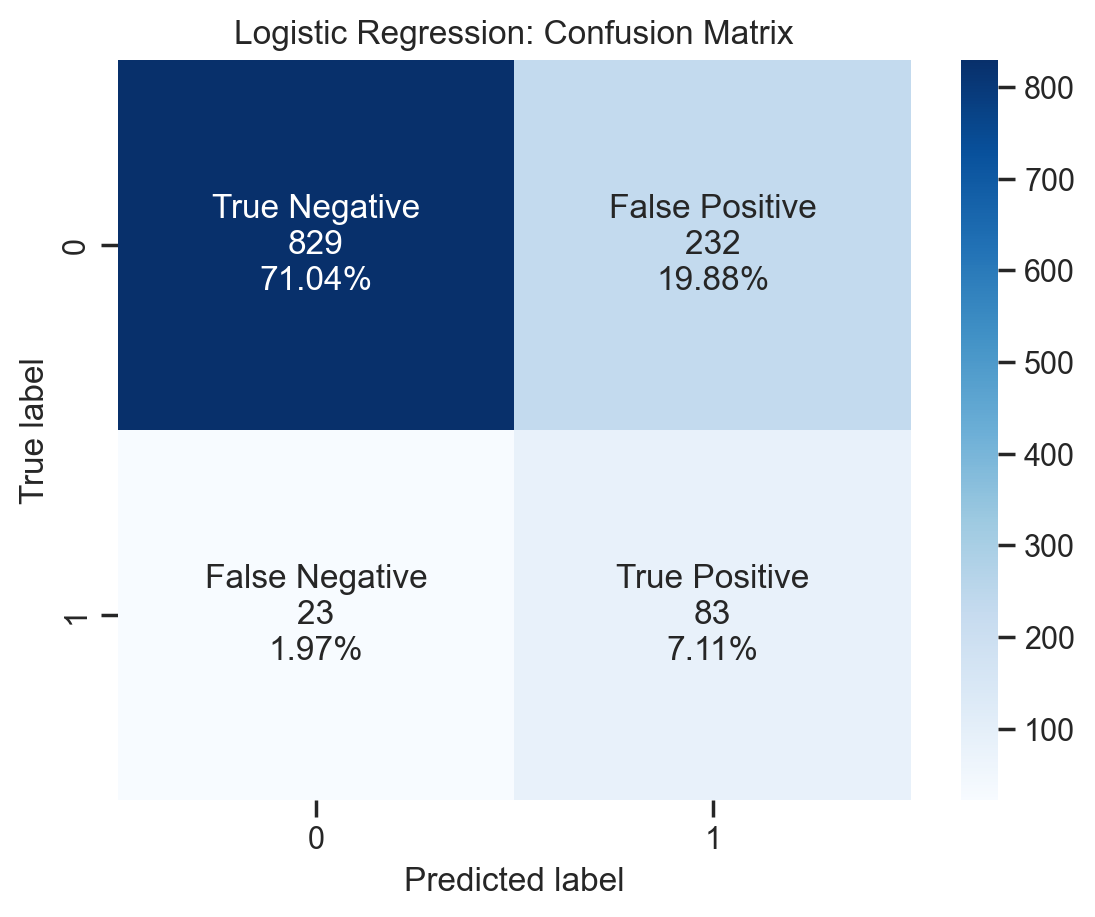

In [58]:
plot_cf_matrix(lr_cf_matrix, model_name="Logistic Regression")
plt.show()

**AUC**

No Skill: ROC AUC=0.5
Logistic Regression: ROC AUC=0.852


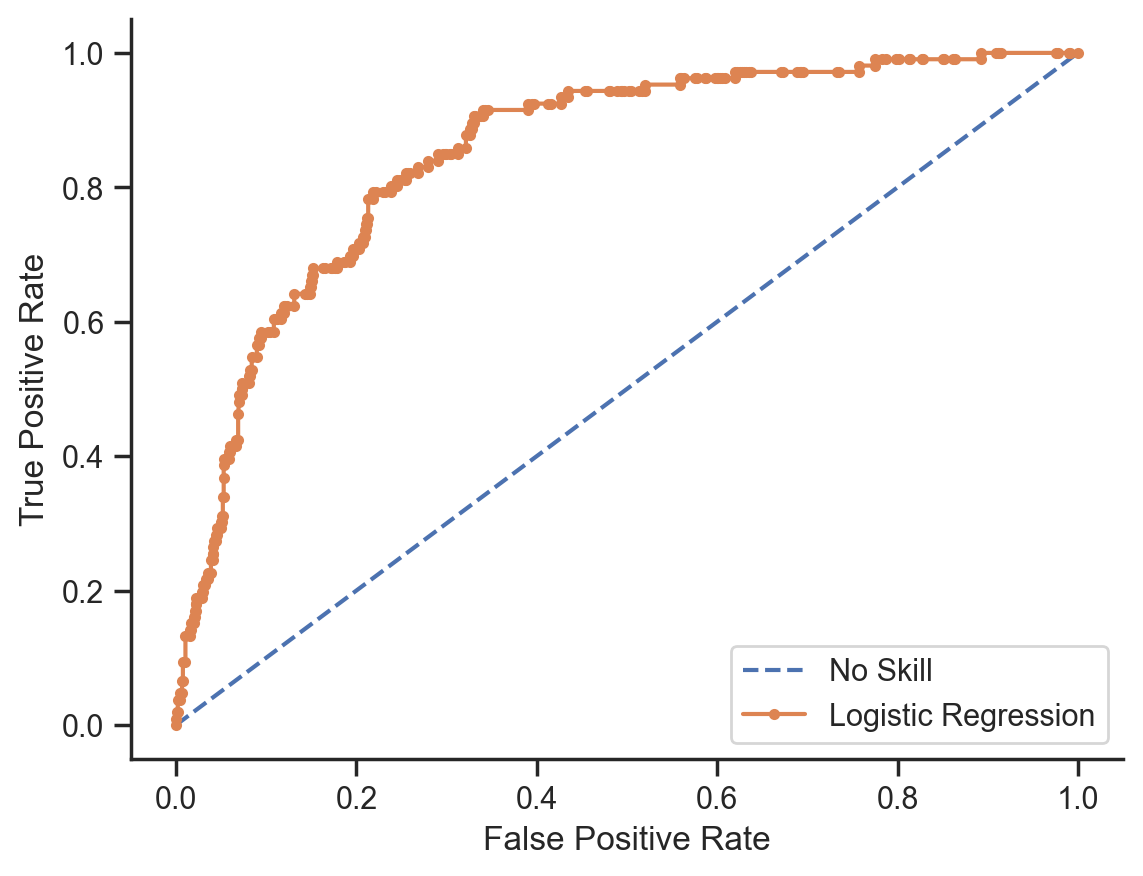

In [59]:
lr_auc, lr_roc_plot = plot_auc(y_test, y_test_predict_probs_lr, model_name="Logistic Regression")

**Performance Metrics**

In [60]:
lr_scores = performance_metrics.head(1)
lr_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
SMOTE,0.781,0.263,0.783,0.394,0.852


#### 10.1.2 Feature Importance

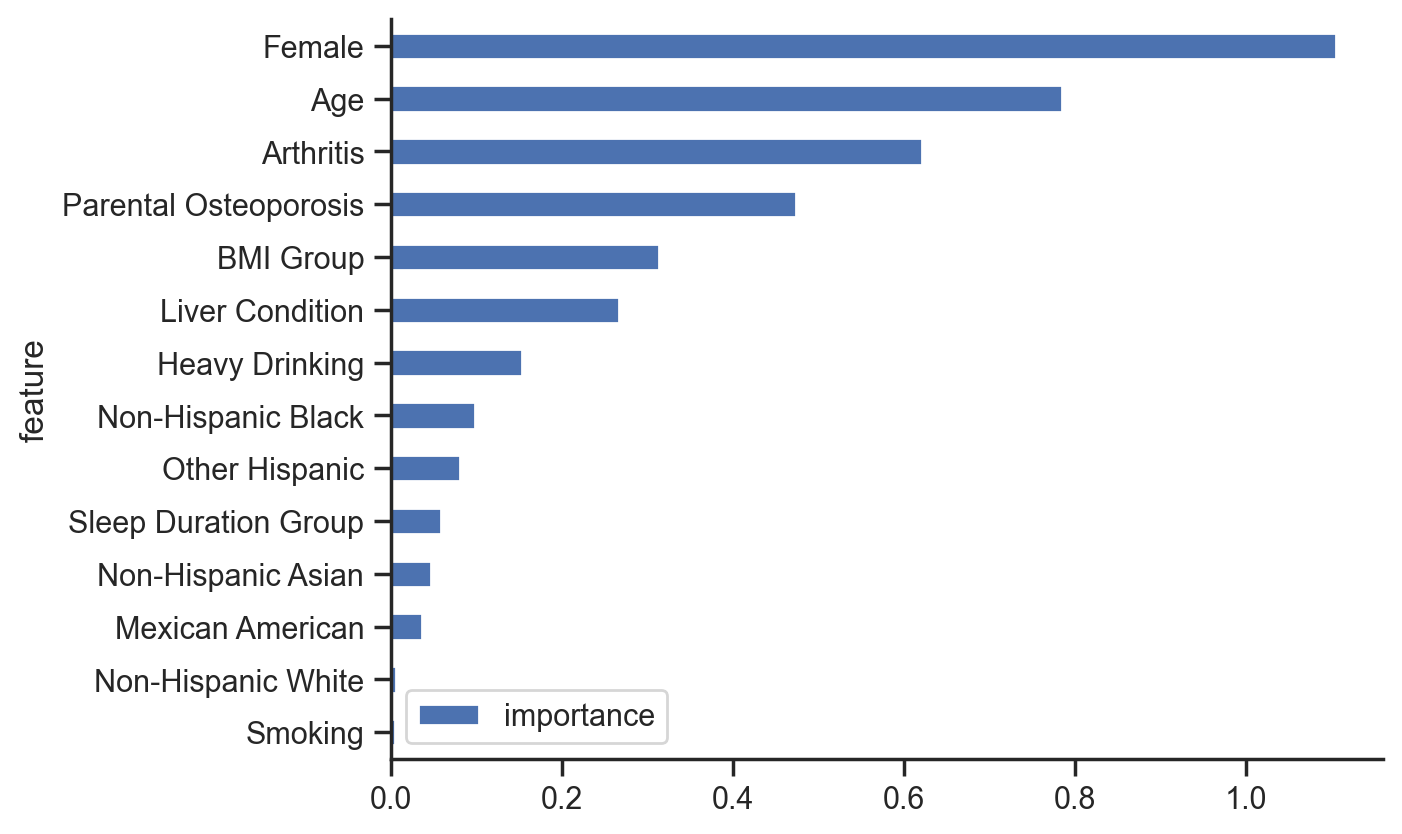

In [61]:
features = X_train_oversample
feature_importance=pd.DataFrame({'feature':list(features.columns),
                                 'importance':[abs(i) for i in lr_model.coef_[0]]})
feature_importance = feature_importance.sort_values('importance',ascending=True)
                               
feature_importance.plot.barh(x='feature', y='importance') 
plt.show()

Gender (Female) is the most important feature to predict osteoporosis, followed by age and arthritis.

### 10.2 Support Vector Machine
#### 10.2.1 Training and Prediction

In [62]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_oversample, y_train_oversample)
y_test_predict_svm = svm_model.predict(X_test_ss)

#### 10.2.2 Model Evaludation

**Confusion Matrix**

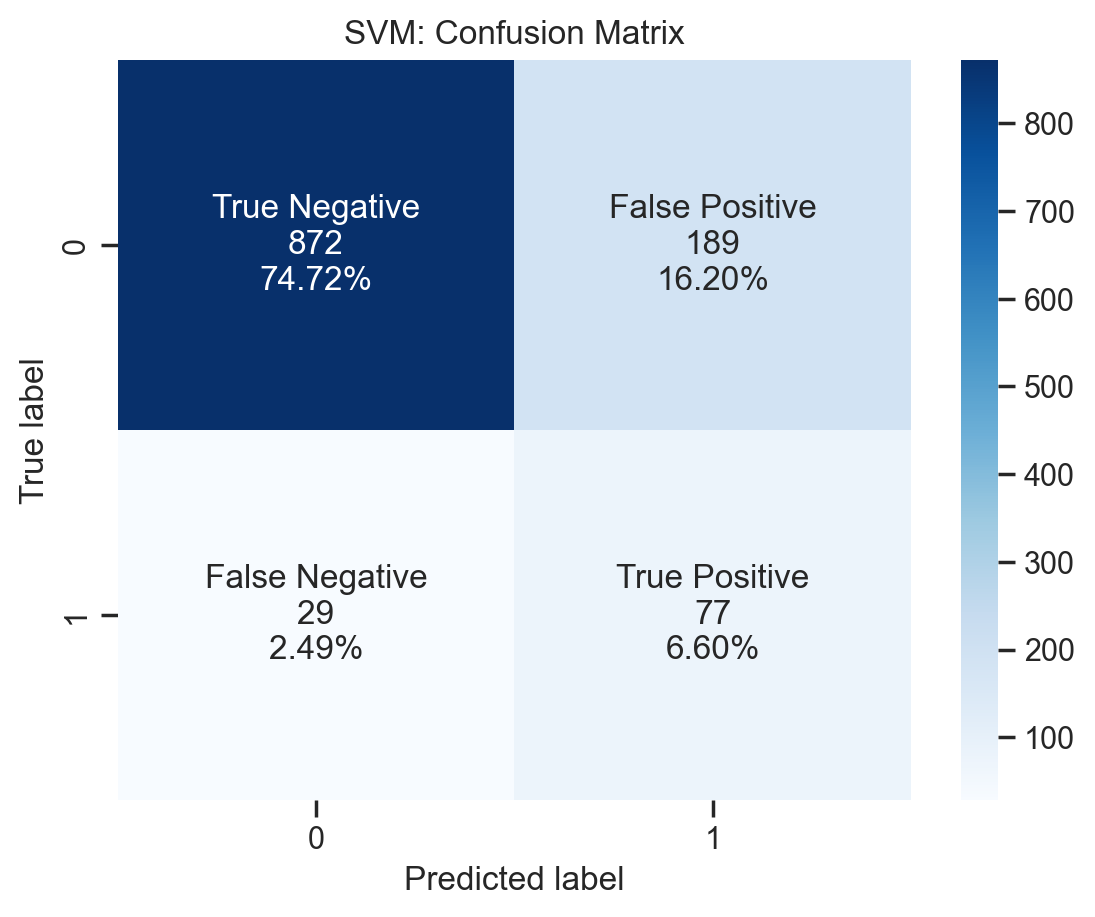

In [63]:
svm_cf_matrix = confusion_matrix(y_test, y_test_predict_svm)
plot_cf_matrix(svm_cf_matrix, model_name="SVM")
plt.show()

**AUC**

No Skill: ROC AUC=0.5
SVM: ROC AUC=0.84


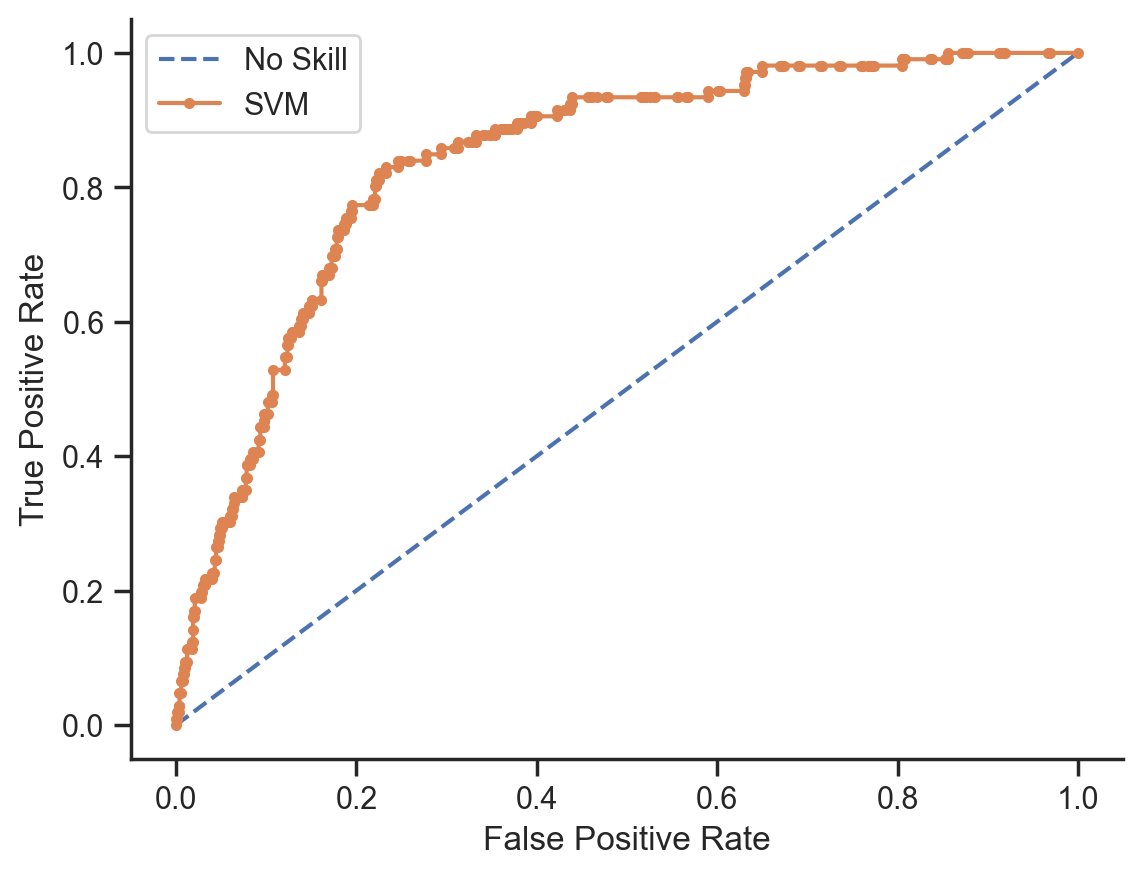

In [64]:
y_test_predict_probs_svm = get_predict_proba(svm_model, X_test_ss)
svm_auc, svm_roc_plot = plot_auc(y_test, y_test_predict_probs_svm, model_name="SVM")

**Performance Metrics**

In [65]:
# precision, accuracy, f1-score, and AUC
svm_model_scores = binary_classification_scores(svm_cf_matrix, 
                                                auc=svm_auc, 
                                                model_name='SVM')
svm_model_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
SVM,0.813,0.289,0.726,0.414,0.84


### 10.3 Random Forest

#### 10.3.1 Training and Prediction

In [66]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_oversample, y_train_oversample)
y_test_predict_rf = rf_model.predict(X_test_ss)

#### 10.3.2 Model Evaluation

**Confusion Matrix**

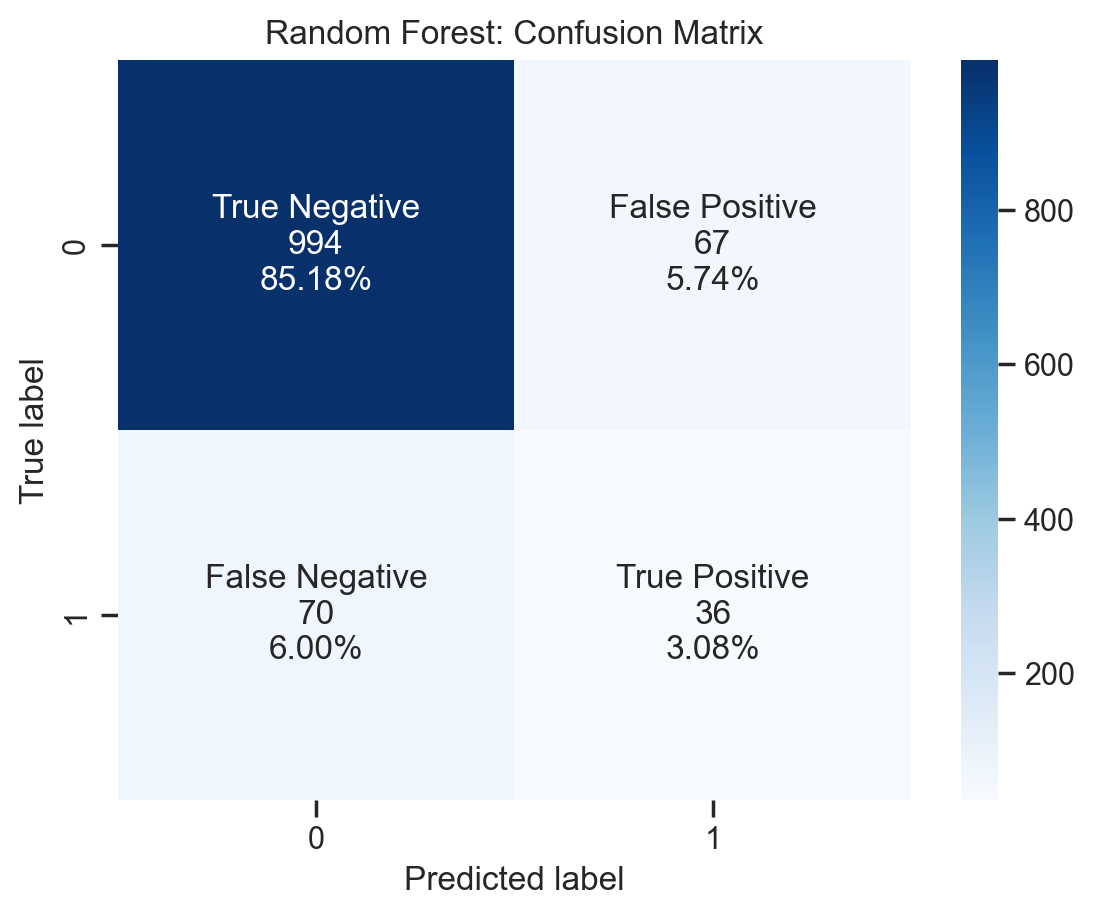

In [67]:
rf_cf_matrix = confusion_matrix(y_test, y_test_predict_rf)
plot_cf_matrix(rf_cf_matrix, model_name="Random Forest")
plt.show()

**AUC**

No Skill: ROC AUC=0.5
Random Forest: ROC AUC=0.816


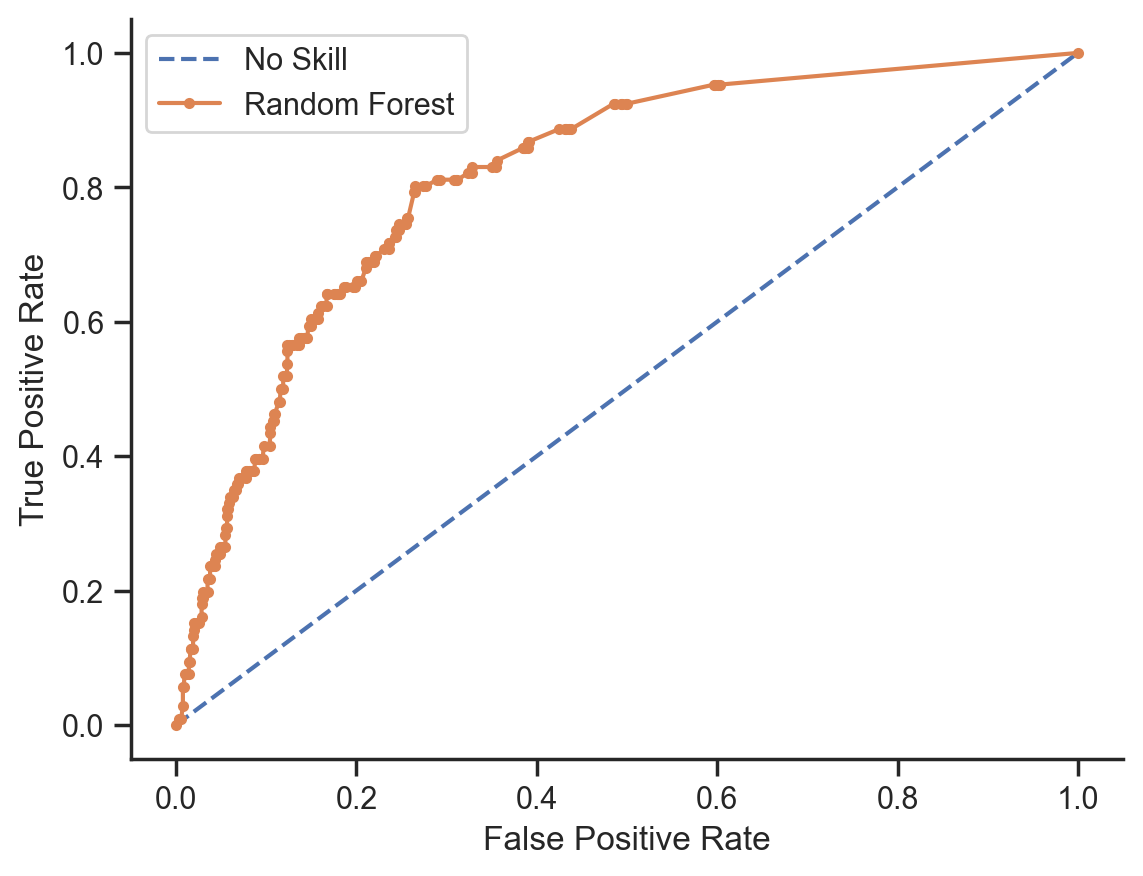

In [68]:
y_test_predict_probs_rf = get_predict_proba(rf_model, X_test_ss)
rf_auc, rf_roc_plot = plot_auc(y_test, y_test_predict_probs_rf, model_name="Random Forest")

**Performance Metrics**

In [69]:
# precision, accuracy, f1-score, and AUC
rf_model_scores = binary_classification_scores(rf_cf_matrix,
                                               auc=rf_auc,
                                               model_name='Random Forest')
rf_model_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
Random Forest,0.883,0.35,0.34,0.344,0.816


### 10.4 Neural Networks

Let's first try a shallow neural network with only one hidden layer. According to book [*From Introduction to Neural Networks for Java (second edition) - Chapter 5*](https://books.google.it/books?id=Swlcw7M4uD8C) by Jeff Heaton :
> There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:
> 1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.
> 2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
> 3. The number of hidden neurons should be less than twice the size of the input layer. 

To start from a simple neural networks model, let's set 1 hidden layer with 7 (rule 1, between the size of the input layer 14 and the size of the output layer 1)

#### 10.4.1 Train the Model

In [70]:
# set seed
np.random.seed(42)
tf.random.set_seed(42)

nn_model = Sequential(
    [      
        # the input, layer 0
        tf.keras.Input(shape=(14,)),
        # hidden layer
        Dense(units=7, name="l1", activation="relu"),
        # the output layer, use linear activation here and set from_logits=True in
        # BinaryCrossentropy to get numerically accurate results 
        Dense(units=1, name="l2", activation="linear")
    ], name = "nn_model" 
)
nn_model.summary()

Model: "nn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 7)                 105       
                                                                 
 l2 (Dense)                  (None, 1)                 8         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


2023-03-19 22:18:54.545120: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [71]:
nn_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.0001),
)

history = nn_model.fit(X_train_oversample, 
                       y_train_oversample, 
                       epochs=110, 
                       batch_size=20, 
                       validation_split=0.2)

Epoch 1/110
339/339 [==============================] - 1s 2ms/step - loss: 0.9243 - val_loss: 0.5501
Epoch 2/110
339/339 [==============================] - 0s 1ms/step - loss: 0.8453 - val_loss: 0.5720
Epoch 3/110
339/339 [==============================] - 0s 1ms/step - loss: 0.7814 - val_loss: 0.5915
Epoch 4/110
339/339 [==============================] - 0s 1ms/step - loss: 0.7298 - val_loss: 0.6066
Epoch 5/110
339/339 [==============================] - 0s 1ms/step - loss: 0.6884 - val_loss: 0.6171
Epoch 6/110
339/339 [==============================] - 0s 1ms/step - loss: 0.6550 - val_loss: 0.6241
Epoch 7/110
339/339 [==============================] - 0s 1ms/step - loss: 0.6276 - val_loss: 0.6289
Epoch 8/110
339/339 [==============================] - 0s 1ms/step - loss: 0.6048 - val_loss: 0.6293
Epoch 9/110
339/339 [==============================] - 0s 1ms/step - loss: 0.5853 - val_loss: 0.6285
Epoch 10/110
339/339 [==============================] - 0s 1ms/step - loss: 0.5684 - val_lo

339/339 [==============================] - 0s 1ms/step - loss: 0.4220 - val_loss: 0.5422
Epoch 82/110
339/339 [==============================] - 0s 1ms/step - loss: 0.4218 - val_loss: 0.5431
Epoch 83/110
339/339 [==============================] - 0s 1ms/step - loss: 0.4216 - val_loss: 0.5429
Epoch 84/110
339/339 [==============================] - 0s 1ms/step - loss: 0.4214 - val_loss: 0.5433
Epoch 85/110
339/339 [==============================] - 0s 1ms/step - loss: 0.4213 - val_loss: 0.5433
Epoch 86/110
339/339 [==============================] - 0s 1ms/step - loss: 0.4210 - val_loss: 0.5422
Epoch 87/110
339/339 [==============================] - 0s 1ms/step - loss: 0.4209 - val_loss: 0.5405
Epoch 88/110
339/339 [==============================] - 0s 1ms/step - loss: 0.4207 - val_loss: 0.5414
Epoch 89/110
339/339 [==============================] - 0s 1ms/step - loss: 0.4205 - val_loss: 0.5403
Epoch 90/110
339/339 [==============================] - 0s 1ms/step - loss: 0.4203 - val_loss: 

#### 10.4.2 Loss Curves

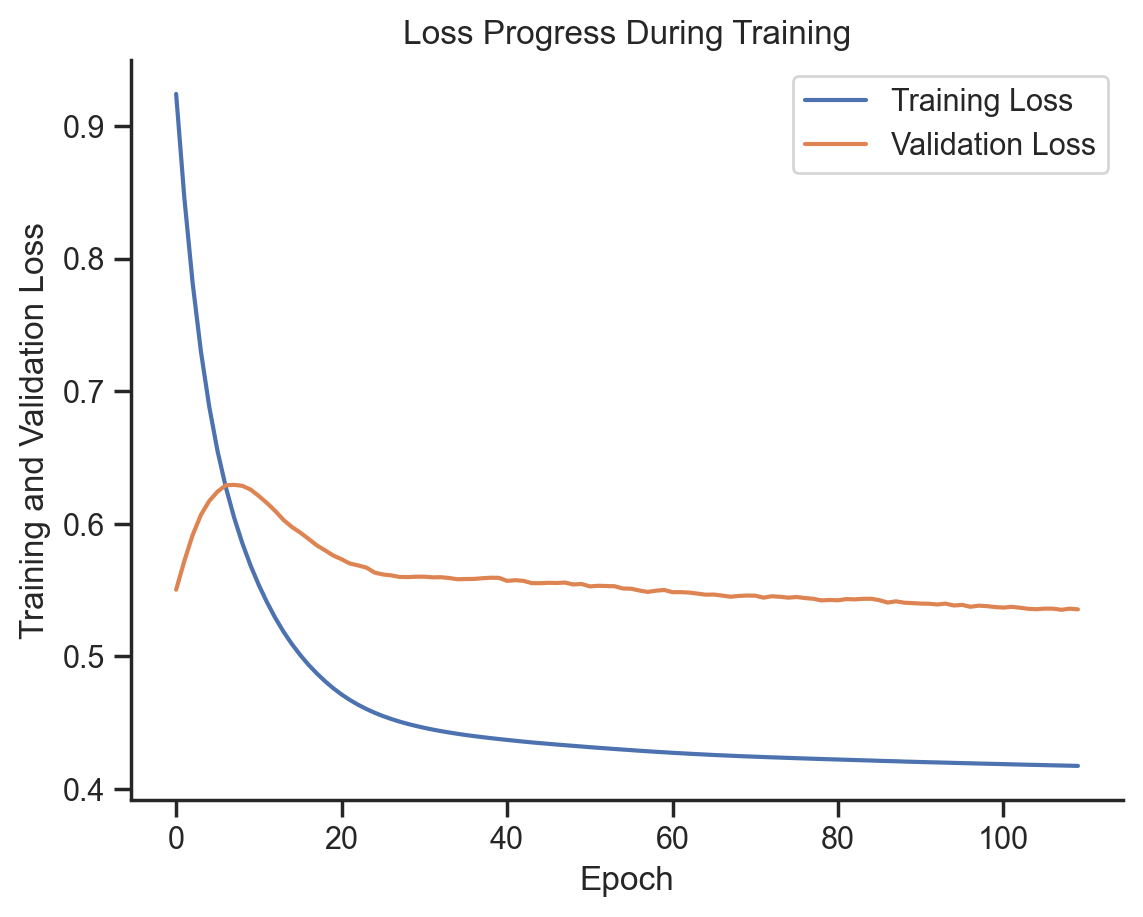

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

The neural networks is valid because the two loss curves are relatively stable in the end.

#### 10.4.3 Model Evaluation
**Confusion Matrix**

37/37 [==============================] - 0s 967us/step


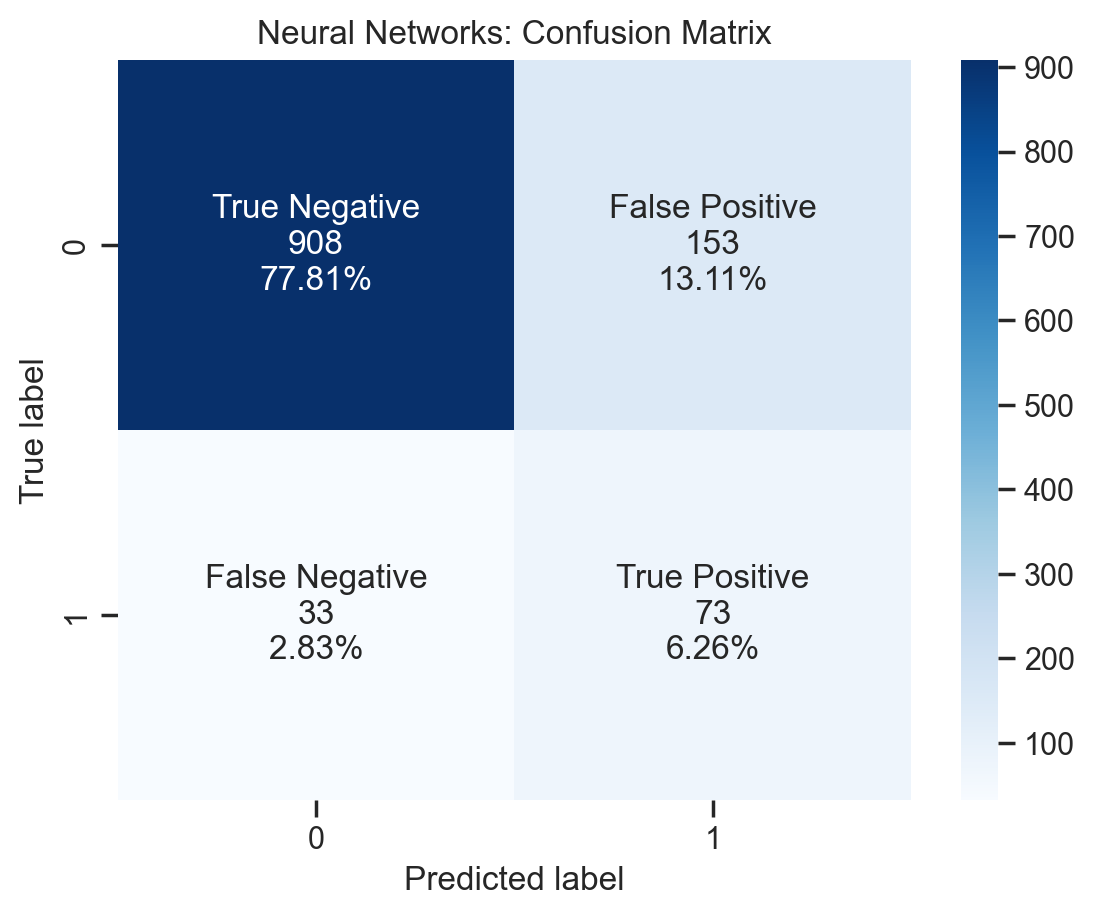

In [73]:
# prediction
y_predict_nn_logit = nn_model.predict(X_test_ss)
# after sigmoid we get the probabilies to be 1
y_predict_nn_prod = tf.nn.sigmoid(y_predict_nn_logit)
# the predicted label will be 1 only when the probability >= 0.5
y_predict_nn = tf.round(y_predict_nn_prod)

# confusion matrix
nn_cf_matrix = confusion_matrix(y_test, y_predict_nn)
plot_cf_matrix(nn_cf_matrix, 'Neural Networks')
plt.show()

**AUC**

No Skill: ROC AUC=0.5
Neural Networks: ROC AUC=0.851


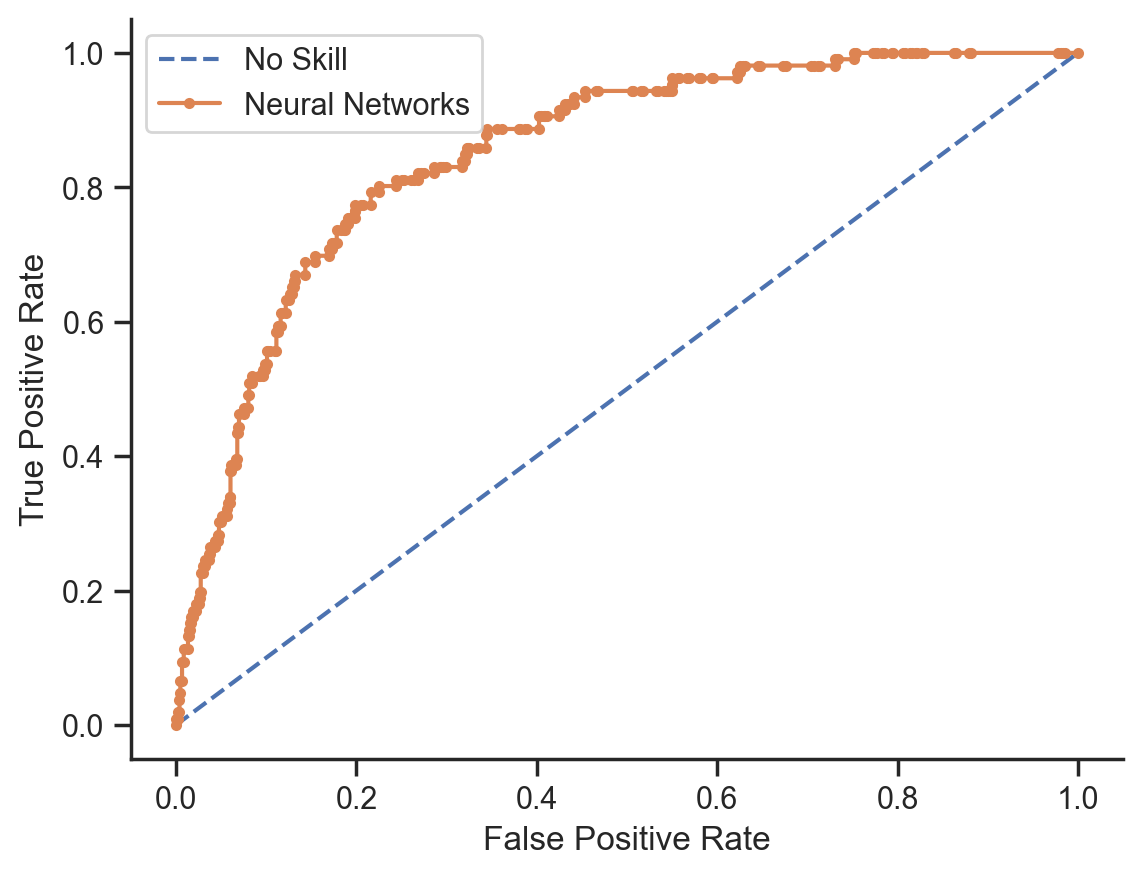

In [74]:
nn_auc, nn_roc_plot = plot_auc(y_test, y_predict_nn_prod, model_name="Neural Networks")

**Performance Metrics**

In [75]:
# precision, accuracy, f1-score, and AUC
nn_model_scores = binary_classification_scores(nn_cf_matrix, auc=nn_auc, 
                                               model_name='Neural Networks')
nn_model_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
Neural Networks,0.841,0.323,0.689,0.44,0.851


### 10.5 Performance Comparison

Now we have performance metrics of 4 models, which one is the best?

**ROC Curve**

No Skill: ROC AUC=0.5
Logistic Regression: ROC AUC=0.852
SVM: ROC AUC=0.84
Random Forest: ROC AUC=0.816
Neural Networks: ROC AUC=0.851


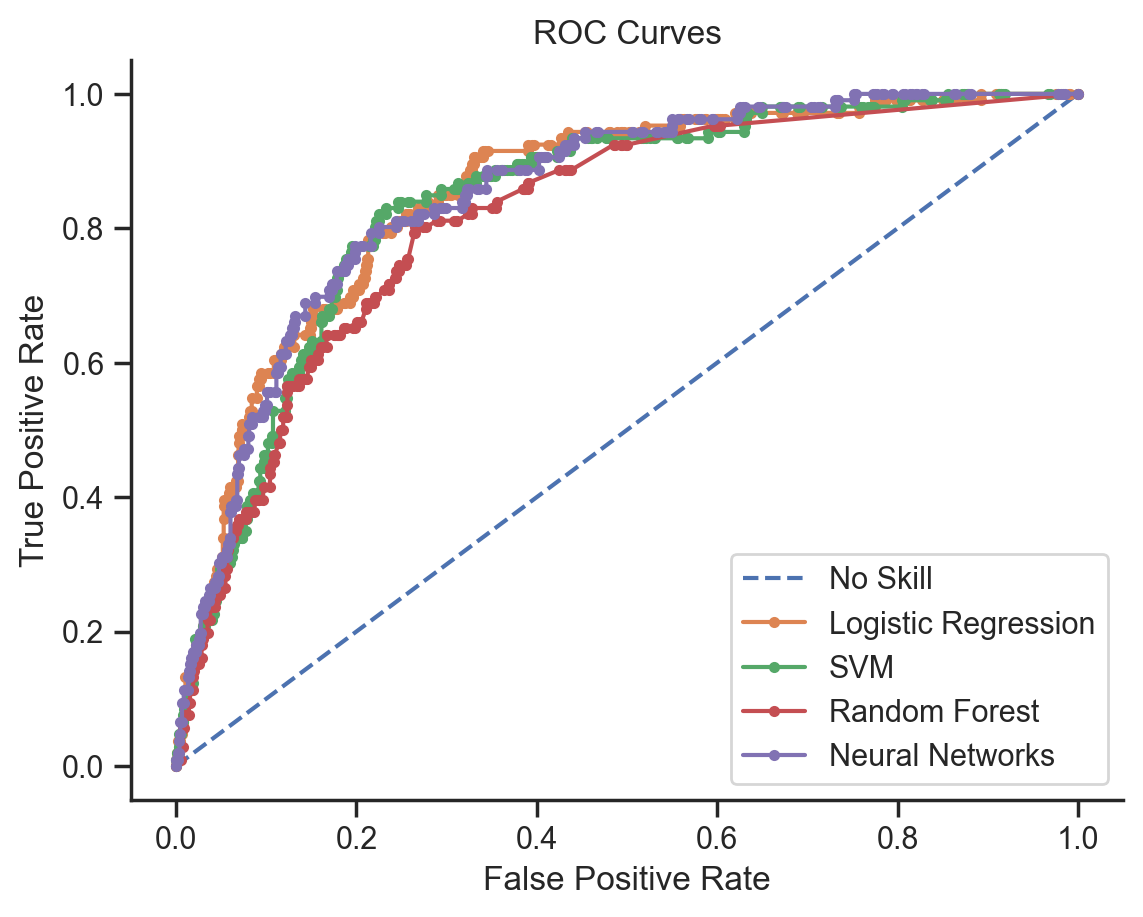

In [77]:
plot_auc(y_test, 
    y_test_predict_probs_lr, 
    model_name="Logistic Regression")
plot_auc(y_test, 
    y_test_predict_probs_svm, 
    display_no_skill=False,
    model_name="SVM")
plot_auc(y_test, 
    y_test_predict_probs_rf, 
    display_no_skill=False,
    model_name="Random Forest")
plot_auc(y_test, 
    y_predict_nn_prod, 
    display_no_skill=False,
    model_name="Neural Networks",
    title="ROC Curves")
plt.show()

**Performance Metrics**

In [78]:
# show performance metrics of all models
lr_scores = lr_scores.rename(index={'SMOTE':'Logistic Regression'})
combined = pd.concat([lr_scores, svm_model_scores, nn_model_scores, rf_model_scores])
combined.sort_values(by=['F1 Score'], ascending=False)

,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
Neural Networks,0.841,0.323,0.689,0.440,0.851
SVM,0.813,0.289,0.726,0.414,0.840
Logistic Regression,0.781,0.263,0.783,0.394,0.852
Random Forest,0.883,0.350,0.340,0.344,0.816


In this project, let's select **Neural Networks** as the final model because it performed best with a sensitivity (recall) 68.9%, a precision of 32.3%, f1 score 0.44 and a measured AUC of 0.85.

Next, let's optimize the neural networks model.

## 11. Neural Networks Optimization

We already know that the neural network model has the highest F1 score, how can we further optimize the model?

There are 2 directions to modify its architecture: width and depth. Let's try both directions.

**Width**

More specially, we can keep the number of hidden layers to 1, make sure the # of nodes is between [2, 28] based on the rule we've mentioned earlier (the number of hidden neurons should be less than twice the size of the input layer). 

In [79]:
# set seed
np.random.seed(42)
tf.random.set_seed(42)

# get the list of models
one_layer_models = get_nn_models(
    num_layers=1, 
    min_nodes_per_layer=2, 
    max_nodes_per_layer=28, 
    node_step_size=4, 
    input_shape=(14,)
)

print(f'# of models = {len(one_layer_models)}')
for model in one_layer_models:
    print(model.name)

# of models = 7
dense2
dense6
dense10
dense14
dense18
dense22
dense26


In [80]:
# train and evaluate models
preds, optimization_results = evaludate_nn_models(
    models=one_layer_models,
    X_train=X_train_oversample,
    y_train=y_train_oversample,
    X_test=X_test_ss,
    y_test=y_test
)

37/37 [==============================] - 0s 842us/step


The final performance metrics:

In [81]:
optimization_results.sort_values(by=['f1', 'recall'], ascending=False)

,model,accuracy,precision,recall,f1,auc
3,dense14,0.844,0.326,0.670,0.438,0.861
4,dense18,0.839,0.320,0.689,0.437,0.861
2,dense10,0.843,0.321,0.651,0.430,0.862
6,dense26,0.834,0.309,0.670,0.423,0.856
1,dense6,0.833,0.306,0.660,0.418,0.865
5,dense22,0.835,0.306,0.642,0.415,0.852
0,dense2,0.812,0.278,0.670,0.393,0.853


The top 3 performance are actually very similar, both simpler or more complex architecture may get better performance.

**Depth**

Now let's increase the number of hidden layers to 2.

In [84]:
two_layer_models = get_nn_models(
    num_layers=2, 
    min_nodes_per_layer=4, 
    max_nodes_per_layer=18,
    node_step_size=6,
    input_shape=(14,)
)

print(f'# of models = {len(two_layer_models)}')
for model in two_layer_models:
    print(model.name)

# of models = 9
dense4_dense4
dense4_dense10
dense4_dense16
dense10_dense4
dense10_dense10
dense10_dense16
dense16_dense4
dense16_dense10
dense16_dense16


In [85]:
# train and evaluate models
deep_preds, deep_optimization_results = evaludate_nn_models(
    models=two_layer_models,
    X_train=X_train_oversample,
    y_train=y_train_oversample,
    X_test=X_test_ss,
    y_test=y_test
)

37/37 [==============================] - 0s 965us/step


In [86]:
deep_optimization_results.sort_values(by=['f1', 'recall'], ascending=False)

,model,accuracy,precision,recall,f1,auc
4,dense10_dense10,0.835,0.321,0.726,0.445,0.850
3,dense10_dense4,0.847,0.329,0.651,0.437,0.847
2,dense4_dense16,0.830,0.307,0.689,0.424,0.854
8,dense16_dense16,0.843,0.318,0.632,0.423,0.853
7,dense16_dense10,0.837,0.311,0.651,0.421,0.866
5,dense10_dense16,0.835,0.308,0.651,0.418,0.858
6,dense16_dense4,0.836,0.306,0.632,0.412,0.864
0,dense4_dense4,0.816,0.288,0.698,0.408,0.861
1,dense4_dense10,0.812,0.278,0.670,0.393,0.849


Combing the 1 layer and 2 layers metrics:

In [87]:
pd.concat([optimization_results, deep_optimization_results]).sort_values(by=['f1', 'recall'], ascending=False)

,model,accuracy,precision,recall,f1,auc
4,dense10_dense10,0.835,0.321,0.726,0.445,0.850
3,dense14,0.844,0.326,0.670,0.438,0.861
4,dense18,0.839,0.320,0.689,0.437,0.861
3,dense10_dense4,0.847,0.329,0.651,0.437,0.847
2,dense10,0.843,0.321,0.651,0.430,0.862
2,dense4_dense16,0.830,0.307,0.689,0.424,0.854
6,dense26,0.834,0.309,0.670,0.423,0.856
8,dense16_dense16,0.843,0.318,0.632,0.423,0.853
7,dense16_dense10,0.837,0.311,0.651,0.421,0.866
1,dense6,0.833,0.306,0.660,0.418,0.865


The best performance are from the dense10_dense10 (2 hidden layer with 10 nodes each), but the top 2-4 models: dense14, dense18, and dense10_dense4 have very similar performance. The improvement through changing the architecture is tiny, which might because the data is not large enough. As the amount of data increases in the future, a clearer optimization solution may be found.

Besides, the precision on the osteoprosis label is relatively low in such a small and imbalanced dataset, while the recall is relatively high. We will likely get better performance as more data is collected. 

Overall, the predictive model with neural networks algorithm could help people understand their risk of developing osteoporosis, helping them decide whether to take further action, such as getting screened or seeing a healthcare professional.